# Alcaldia statistics

In [218]:
station_df

Station_ID                    Colonia       Alcaldia   Latitude  \
0             1                 Cuauhtémoc     Cuauhtémoc  19.433590   
1             2                 Cuauhtémoc     Cuauhtémoc  19.430623   
2             3                 Tabacalera     Cuauhtémoc  19.431630   
3             4                 Cuauhtémoc     Cuauhtémoc  19.428491   
4             5                 Cuauhtémoc     Cuauhtémoc  19.429804   
..          ...                        ...            ...        ...   
670         268                 Buenavista     Cuauhtémoc  19.442467   
671         271                 Buenavista     Cuauhtémoc  19.443684   
672         273                 Buenavista     Cuauhtémoc  19.442707   
673         390                    Actipan  Benito Juárez  19.373384   
674         445  General Pedro María Anaya  Benito Juárez  19.358934   

     Longitude  
0   -99.167819  
1   -99.171231  
2   -99.158547  
3   -99.171693  
4   -99.169451  
..         ...  
670 -99.151658  
671 -99.152465  
672 -99.152956  
673 -99.178173  
674 -99.156064  

[675 rows x 5 columns]

## I need to join station_df with the trips dataframes, I will drop some columns that are not needed for the analysis

## Check that station ids in both dataframes match before joining

In [221]:
# Step 1: Extract unique values of Station_ID from station_df
station_ids = station_df['Station_ID'].unique()

# Step 2: Extract unique values of Pickup_Station_ID from combined_2018_present
pickup_station_ids = combined_2023_2024['Pickup_Station_ID'].unique()

# Step 3: Compare the sets to ensure all Pickup_Station_IDs are in Station_IDs
missing_station_ids = set(pickup_station_ids) - set(station_ids)

if missing_station_ids:
    print(f"There are missing Station IDs in station_df: {missing_station_ids}")
else:
    print("All Pickup_Station_IDs in combined_2023_2024 exist in station_df.")

All Pickup_Station_IDs in combined_2023_2024 exist in station_df.


In [222]:
combined_2023_2024

Trip_ID Gender  Age  Pickup_Station_ID Pickup_Date Pickup_Time  \
0                0      M   31                 16  2023-01-01    00:09:44   
1                1      M   35                 16  2023-01-01    00:10:00   
2                2      M   27                 19  2023-01-01    00:02:27   
3                3      M   41                261  2023-01-01    00:08:58   
4                4      M   34                132  2023-01-01    00:17:36   
...            ...    ...  ...                ...         ...         ...   
20193612  20193612      M   29                277  2024-05-15    22:21:13   
20193613  20193613      M   59                596  2024-05-15    22:22:57   
20193614  20193614      M   33                 69  2024-05-15    22:01:17   
20193615  20193615      F   30                560  2024-05-15    22:16:41   
20193616  20193616      M   30                 74  2024-05-15    22:16:31   

          Return_Station_ID Return_Date Return_Time  Trip_Duration  Year  \
0                         2  2023-01-01    00:14:43            5.0  2023   
1                         2  2023-01-01    00:14:49            4.8  2023   
2                        76  2023-01-01    00:15:05           12.6  2023   
3                       212  2023-01-01    00:18:37            9.6  2023   
4                       127  2023-01-01    00:20:15            2.6  2023   
...                     ...         ...         ...            ...   ...   
20193612                151  2024-05-15    22:26:19            5.1  2024   
20193613                598  2024-05-15    22:26:20            3.4  2024   
20193614                352  2024-05-15    22:26:23           25.1  2024   
20193615                584  2024-05-15    22:26:24            9.7  2024   
20193616                190  2024-05-15    22:26:25            9.9  2024   

         Month   Week_Day  Hour Age_Group  
0            1     Sunday     0     26-35  
1            1     Sunday     0     26-35  
2            1     Sunday     0     26-35  
3            1     Sunday     0     36-45  
4            1     Sunday     0     26-35  
...        ...        ...   ...       ...  
20193612     5  Wednesday    22     26-35  
20193613     5  Wednesday    22     46-60  
20193614     5  Wednesday    22     26-35  
20193615     5  Wednesday    22     26-35  
20193616     5  Wednesday    22     26-35  

[20193617 rows x 15 columns]

In [223]:
combined_2023_2024_filtered = combined_2023_2024[['Gender', 'Age', 'Pickup_Station_ID', 'Year', 'Month', 'Week_Day', 'Hour', 'Trip_Duration', 'Age_Group']]
merged_2023_2024_stations = pd.merge(combined_2023_2024_filtered, station_df, left_on='Pickup_Station_ID', right_on='Station_ID', how='inner')
merged_2023_2024_stations

Gender  Age  Pickup_Station_ID  Year Month   Week_Day  Hour  \
0             M   31                 16  2023     1     Sunday     0   
1             M   35                 16  2023     1     Sunday     0   
2             M   27                 19  2023     1     Sunday     0   
3             M   41                261  2023     1     Sunday     0   
4             M   34                132  2023     1     Sunday     0   
...         ...  ...                ...   ...   ...        ...   ...   
20193612      M   29                277  2024     5  Wednesday    22   
20193613      M   59                596  2024     5  Wednesday    22   
20193614      M   33                 69  2024     5  Wednesday    22   
20193615      F   30                560  2024     5  Wednesday    22   
20193616      M   30                 74  2024     5  Wednesday    22   

          Trip_Duration Age_Group  Station_ID            Colonia  \
0                   5.0     26-35          16         Cuauhtémoc   
1                   4.8     26-35          16         Cuauhtémoc   
2                  12.6     26-35          19         Cuauhtémoc   
3                   9.6     36-45         261         Cuauhtémoc   
4                   2.6     26-35         132         Roma Norte   
...                 ...       ...         ...                ...   
20193612            5.1     26-35         277  Narvarte Poniente   
20193613            3.4     46-60         596           Narvarte   
20193614           25.1     26-35          69          Hipódromo   
20193615            9.7     26-35         560           Doctores   
20193616            9.9     26-35          74          Hipódromo   

               Alcaldia   Latitude  Longitude  
0            Cuauhtémoc  19.426753 -99.168619  
1            Cuauhtémoc  19.426753 -99.168619  
2            Cuauhtémoc  19.429453 -99.162830  
3            Cuauhtémoc  19.424910 -99.172455  
4            Cuauhtémoc  19.420667 -99.156450  
...                 ...        ...        ...  
20193612  Benito Juárez  19.401807 -99.159090  
20193613  Benito Juárez  19.395205 -99.155049  
20193614     Cuauhtémoc  19.410797 -99.168143  
20193615     Cuauhtémoc  19.421599 -99.143408  
20193616     Cuauhtémoc  19.410468 -99.172802  

[20193617 rows x 14 columns]

In [224]:
# Set names for the dataframes for identification in the loop
combined_2023.name = 'combined_2023'
combined_2024.name = 'combined_2024'

# List of dataframes to check
dataframes_to_check = [combined_2023, combined_2024]

# Extract unique values of Station_ID from station_df
station_ids = station_df['Station_ID'].unique()

# Loop over each dataframe
for df in dataframes_to_check:
    # Extract unique values of Pickup_Station_ID from the current dataframe
    pickup_station_ids = df['Pickup_Station_ID'].unique()

    # Compare the sets to ensure all Pickup_Station_IDs are in Station_IDs
    missing_station_ids = set(pickup_station_ids) - set(station_ids)

    # Print results
    if missing_station_ids:
        print(f"There are missing Station IDs in station_df for dataframe {df.name}: {missing_station_ids}")
    else:
        print(f"All Pickup_Station_IDs in dataframe {df.name} exist in station_df.")

All Pickup_Station_IDs in dataframe combined_2023 exist in station_df.
All Pickup_Station_IDs in dataframe combined_2024 exist in station_df.


## Splitting dataframe for 2023 and 2024 to analyze separately

In [226]:
merged_2023_2024_stations

Gender  Age  Pickup_Station_ID  Year Month   Week_Day  Hour  \
0             M   31                 16  2023     1     Sunday     0   
1             M   35                 16  2023     1     Sunday     0   
2             M   27                 19  2023     1     Sunday     0   
3             M   41                261  2023     1     Sunday     0   
4             M   34                132  2023     1     Sunday     0   
...         ...  ...                ...   ...   ...        ...   ...   
20193612      M   29                277  2024     5  Wednesday    22   
20193613      M   59                596  2024     5  Wednesday    22   
20193614      M   33                 69  2024     5  Wednesday    22   
20193615      F   30                560  2024     5  Wednesday    22   
20193616      M   30                 74  2024     5  Wednesday    22   

          Trip_Duration Age_Group  Station_ID            Colonia  \
0                   5.0     26-35          16         Cuauhtémoc   
1                   4.8     26-35          16         Cuauhtémoc   
2                  12.6     26-35          19         Cuauhtémoc   
3                   9.6     36-45         261         Cuauhtémoc   
4                   2.6     26-35         132         Roma Norte   
...                 ...       ...         ...                ...   
20193612            5.1     26-35         277  Narvarte Poniente   
20193613            3.4     46-60         596           Narvarte   
20193614           25.1     26-35          69          Hipódromo   
20193615            9.7     26-35         560           Doctores   
20193616            9.9     26-35          74          Hipódromo   

               Alcaldia   Latitude  Longitude  
0            Cuauhtémoc  19.426753 -99.168619  
1            Cuauhtémoc  19.426753 -99.168619  
2            Cuauhtémoc  19.429453 -99.162830  
3            Cuauhtémoc  19.424910 -99.172455  
4            Cuauhtémoc  19.420667 -99.156450  
...                 ...        ...        ...  
20193612  Benito Juárez  19.401807 -99.159090  
20193613  Benito Juárez  19.395205 -99.155049  
20193614     Cuauhtémoc  19.410797 -99.168143  
20193615     Cuauhtémoc  19.421599 -99.143408  
20193616     Cuauhtémoc  19.410468 -99.172802  

[20193617 rows x 14 columns]

In [227]:
# Filter data for 2023 and 2024
data_2023 = merged_2023_2024_stations[merged_2023_2024_stations['Year'] == 2023]
data_2024 = merged_2023_2024_stations[merged_2023_2024_stations['Year'] == 2024]

# Print value counts for each year
print("Value counts for Alcaldia in 2023:")
print(data_2023['Alcaldia'].value_counts())
print("\n")

print("Value counts for Alcaldia in 2024:")
print(data_2024['Alcaldia'].value_counts())
print("\n")

Value counts for Alcaldia in 2023:
Alcaldia
Cuauhtémoc        7060121
Miguel Hidalgo    2536572
Benito Juárez     2456061
Coyoacan           100982
Alvaro Obregon      14498
Azcapotzalco         7750
Name: count, dtype: Int64


Value counts for Alcaldia in 2024:
Alcaldia
Cuauhtémoc        4199595
Benito Juárez     1862536
Miguel Hidalgo    1627785
Coyoacan           166902
Azcapotzalco        91940
Alvaro Obregon      68875
Name: count, dtype: Int64




In [ ]:
# Group by 'Year' and 'Alcaldia', then count the occurrences
alcaldia_counts_by_year = merged_2023_2024_stations.groupby(['Year', 'Alcaldia']).size().reset_index(name='Trip_Counts')

colors1 = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#c90076']

# Create a horizontal bar chart with facets for each year
fig = px.bar(
    alcaldia_counts_by_year,
    x='Trip_Counts',               # x-axis: Trip_Counts
    y='Alcaldia',                 # y-axis: Alcaldia
    color='Alcaldia',            # Color by Alcaldia to differentiate between them
    facet_row='Year',            # Create separate rows for each year
    orientation='h',            # Horizontal bars
    title='Trip Counts per Alcaldia for 2023 and 2024',  # Title of the graph
    labels={'Trip_Counts': 'Number of Trips', 'Alcaldia': 'Alcaldia'},  # Axis labels
    height=600,  # Height of the figure
    width=1800,   # Width of the figure
    color_discrete_sequence=colors1  # Use a color sequence for Alcaldias
)


fig.show()

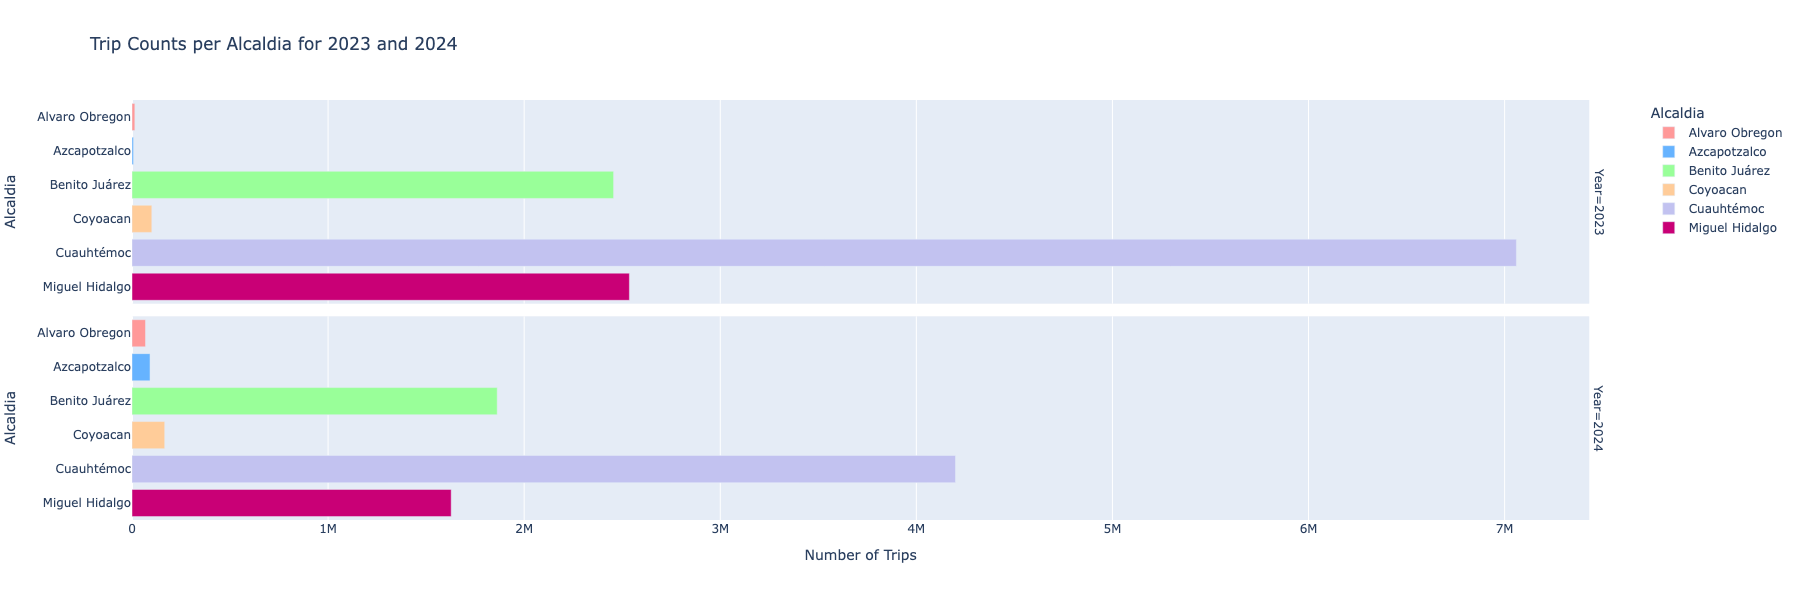

### Cuauhtémoc consistently has the highest number of trips across both years, indicating it is a major hub for trips.
### Miguel Hidalgo and Benito Juárez also show significant trip counts but with much less variability compared to Cuauhtémoc.
### The peak in 2023 for Cuauhtémoc (7,060,121 trips) indicates a significant increase
### The decrease in 2024 compared to 2023 in Cuauhtémoc (from 7,060,121 to 4,199,595 trips) needs to be viewed with the understanding that 2024 is still ongoing. 
### Therefore, it is expected that the final count for 2024 could show an overall increase in trips once the year concludes.

In [230]:
data_2023.groupby('Alcaldia')['Pickup_Station_ID'].nunique()

Alcaldia
Alvaro Obregon     11
Azcapotzalco       11
Benito Juárez     204
Coyoacan           37
Cuauhtémoc        233
Miguel Hidalgo    134
Name: Pickup_Station_ID, dtype: int64

In [231]:
# Filter data for 2023 and 2024
data_2023_station_count_alcaldia = data_2023.groupby('Alcaldia')['Pickup_Station_ID'].nunique()
data_2024_station_count_alcaldia = data_2024.groupby('Alcaldia')['Pickup_Station_ID'].nunique()

# Print distinct Pickup_Station_ID counts for each year
print("Distinct Pickup Stations for Alcaldia in 2023:")
print(data_2023_station_count_alcaldia)
print("\n")

print("Distinct Pickup Stations for Alcaldia in 2024:")
print(data_2024_station_count_alcaldia)
print("\n")

Distinct Pickup Stations for Alcaldia in 2023:
Alcaldia
Alvaro Obregon     11
Azcapotzalco       11
Benito Juárez     204
Coyoacan           37
Cuauhtémoc        233
Miguel Hidalgo    134
Name: Pickup_Station_ID, dtype: int64


Distinct Pickup Stations for Alcaldia in 2024:
Alcaldia
Alvaro Obregon     13
Azcapotzalco       24
Benito Juárez     212
Coyoacan           37
Cuauhtémoc        243
Miguel Hidalgo    137
Name: Pickup_Station_ID, dtype: int64




In [ ]:
# Group by 'Year' and 'Alcaldia', then count the distinct occurrences of 'Pickup_Station_ID'
alcaldia_station_counts_by_year = (
    merged_2023_2024_stations
    .groupby(['Year', 'Alcaldia'])['Pickup_Station_ID']
    .nunique()
    .reset_index(name='Distinct_Pickup_Station_ID')
)

# Create a horizontal bar chart with facets for each year
fig = px.bar(
    alcaldia_station_counts_by_year,
    x='Distinct_Pickup_Station_ID',  # x-axis: Distinct Pickup_Station_ID
    y='Alcaldia',                    # y-axis: Alcaldia
    color='Alcaldia',               # Color by Alcaldia to differentiate between them
    facet_row='Year',               # Create separate rows for each year
    orientation='h',              # Horizontal bars
    title='Distinct Pickup Stations per Alcaldia for 2023 and 2024',  # Title of the graph
    labels={'Distinct_Pickup_Station_ID': 'Number of Distinct Pickup Stations', 'Alcaldia': 'Alcaldia'},  # Axis labels
    height=600,  # Height of the figure
    width=1800,   # Width of the figure
    color_discrete_sequence=colors1  # Use a color sequence for Alcaldias
)

# Show the figure
fig.show()

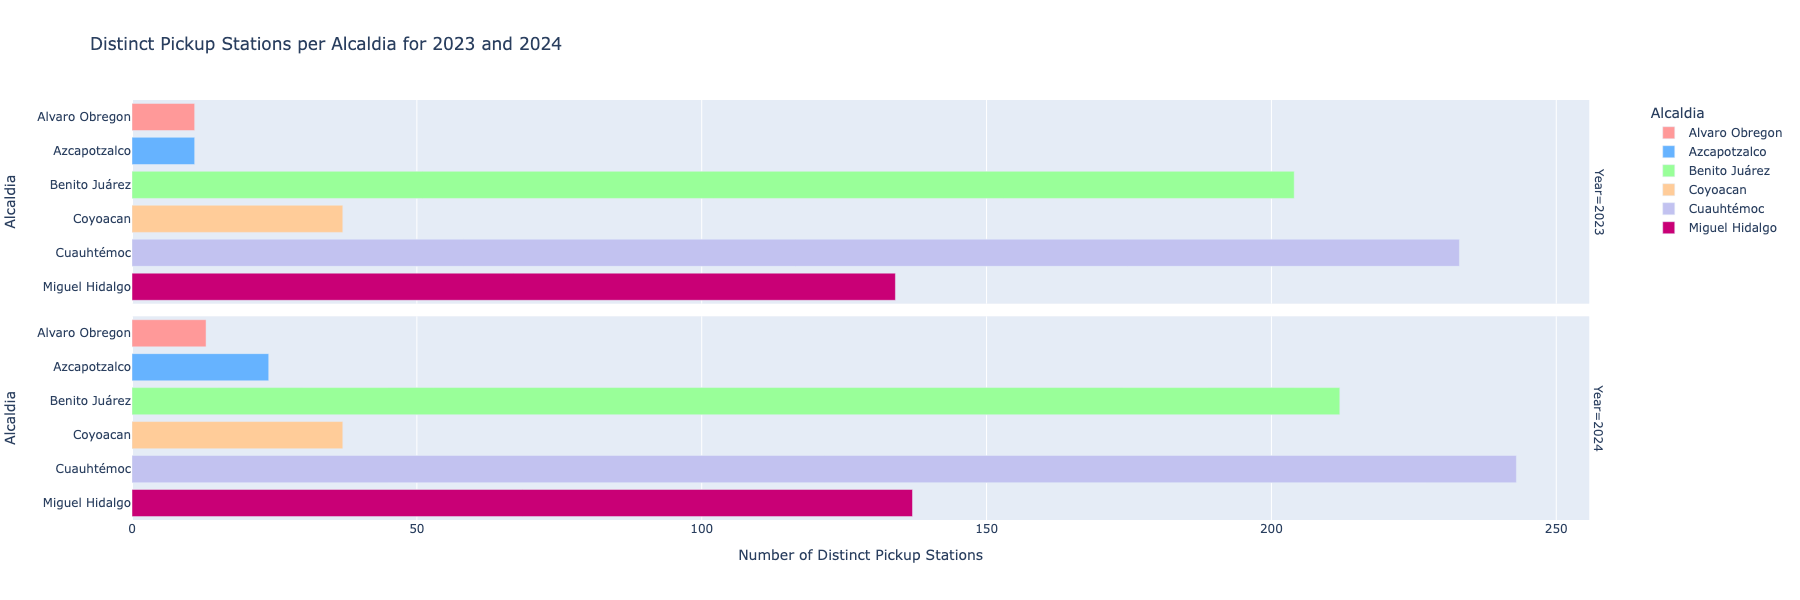

### Cuauhtemoc, Benito Juarez and Miguel Hidalgo are the alcaldias for most trips and most bike stations 
### 2024, Alvaro Obrego records the least amount of stations with 13

In [234]:
merged_2023_2024_stations.groupby(['Year', 'Alcaldia', 'Gender']).size().reset_index(name='Count')

Year        Alcaldia Gender    Count
0   2023  Alvaro Obregon      F     4102
1   2023  Alvaro Obregon      M    10396
2   2023    Azcapotzalco      F     2041
3   2023    Azcapotzalco      M     5709
4   2023   Benito Juárez      F   683453
5   2023   Benito Juárez      M  1772608
6   2023        Coyoacan      F    29537
7   2023        Coyoacan      M    71445
8   2023      Cuauhtémoc      F  2049746
9   2023      Cuauhtémoc      M  5010375
10  2023  Miguel Hidalgo      F   726393
11  2023  Miguel Hidalgo      M  1810179
12  2024  Alvaro Obregon      F    19455
13  2024  Alvaro Obregon      M    49420
14  2024    Azcapotzalco      F    26974
15  2024    Azcapotzalco      M    64966
16  2024   Benito Juárez      F   554856
17  2024   Benito Juárez      M  1307680
18  2024        Coyoacan      F    52719
19  2024        Coyoacan      M   114183
20  2024      Cuauhtémoc      F  1267571
21  2024      Cuauhtémoc      M  2932024
22  2024  Miguel Hidalgo      F   477476
23  2024  Miguel Hidalgo      M  1150309

In [ ]:
# Group by 'Alcaldia' and 'Gender' to get the count of each gender for each Alcaldia
gender_counts_alcaldia = merged_2023_2024_stations.groupby(['Year', 'Alcaldia', 'Gender']).size().reset_index(name='Count')

# Create a pie chart using Plotly Express with facet wrapping by Alcaldia and Year
fig = px.pie(
    gender_counts_alcaldia,       # DataFrame with counts
    values='Count',               # Values for the pie chart
    names='Gender',              # Labels for the pie chart
    color='Gender',             # Color by Gender
    facet_col='Alcaldia',      # Facet by Alcaldia (columns)
    facet_row='Year',          # Facet by Year (rows)
    title='Gender Distribution of Trips by Alcaldia for 2023 and 2024',
    color_discrete_sequence=['pink', 'blue']  # Colors for the genders
)

# Customize the layout
fig.update_layout(
    title_font_size=18,
    height=1000,  # Set the desired height
    showlegend=True
)

# Update annotations to display Alcaldia names and years properly
for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split('=')[-1]
    if 'Coyoacan' in annotation.text:
        annotation.font.size = 16
        annotation.font.color = 'red'
    else:
        annotation.update(font=dict(size=14))  # Adjust the font size as needed

# Show the plot
fig.show()

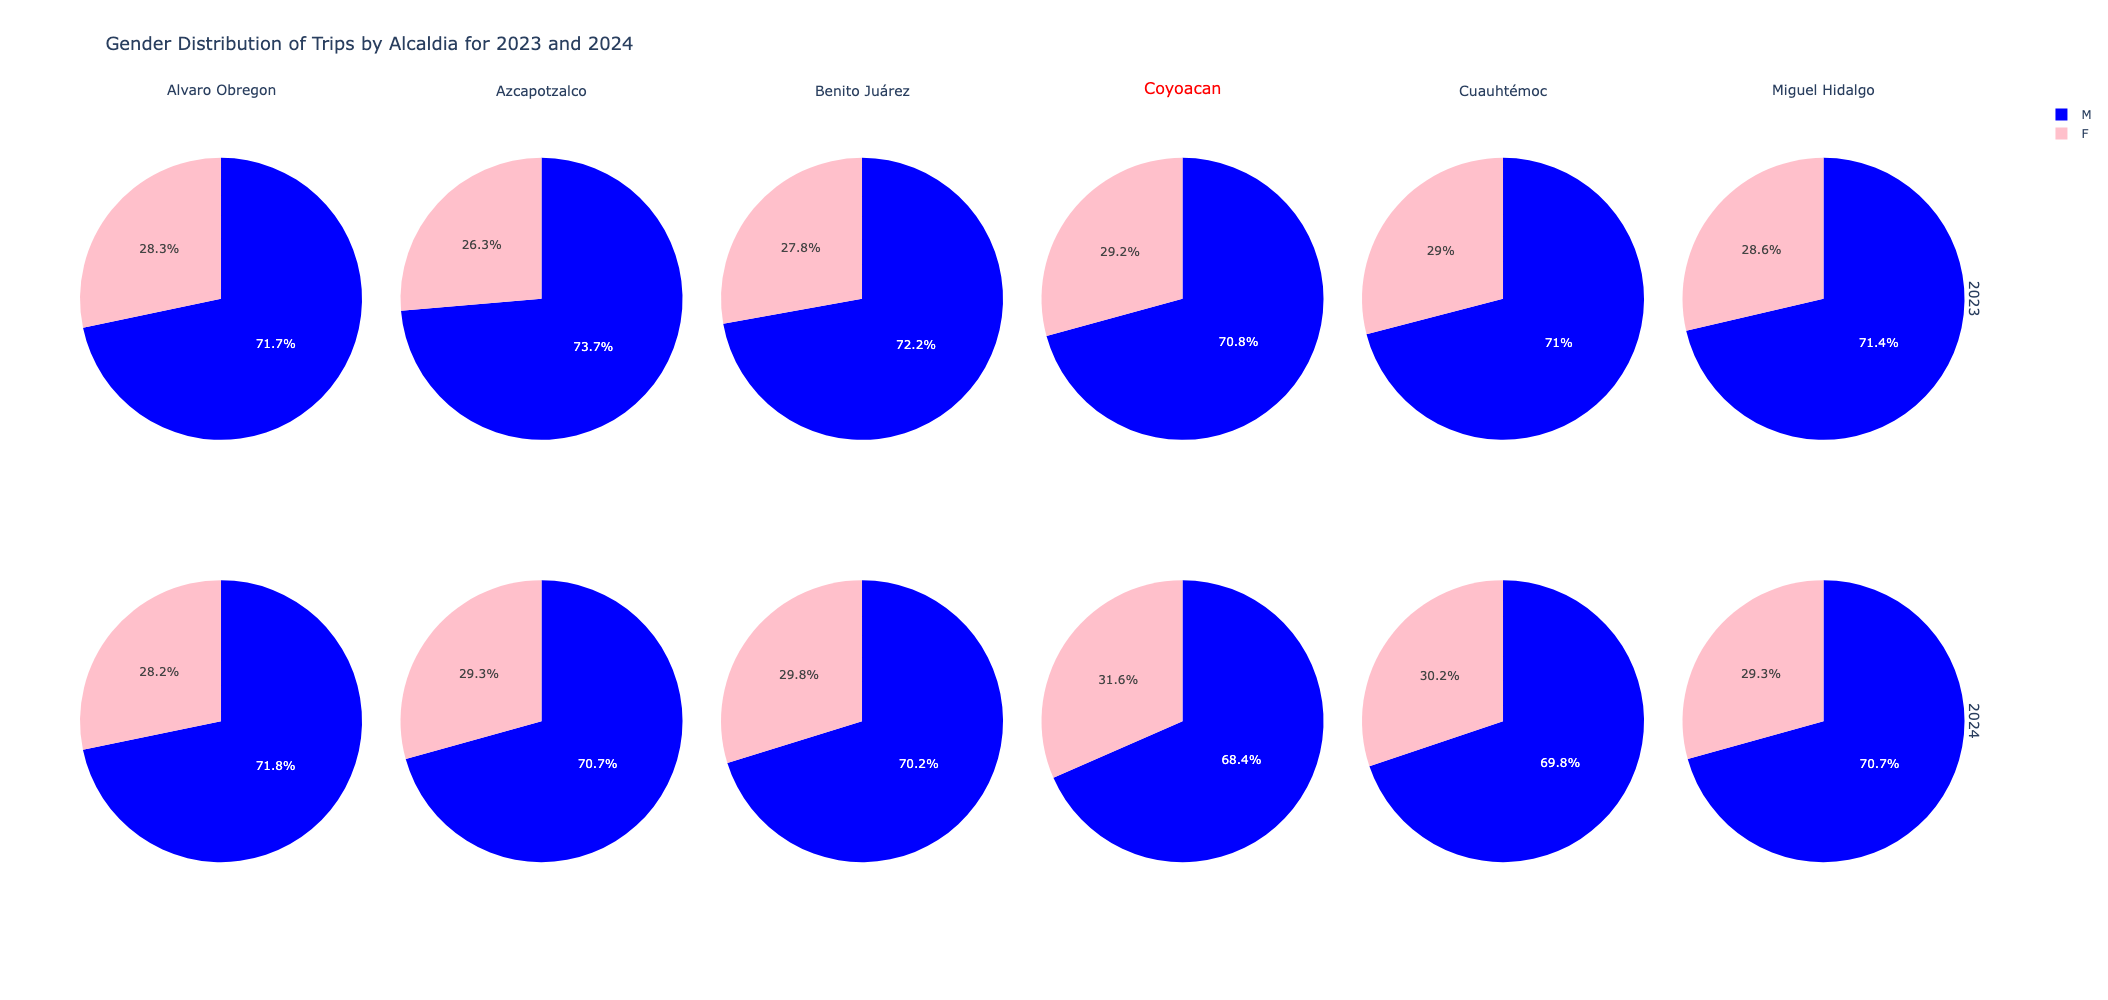

### 2024 showed increase in feamle trips for all alcaldias except for Alvaro Obregon
### Coyoacan shows the highest percentage of Female users in both years while being having less riders than Cuauhtemoc, benito juarez and miguel hidalgo 

In [237]:
merged_2023_2024_stations.groupby(['Year', 'Alcaldia', 'Age_Group']).size().reset_index(name='Count').head(10)

Year        Alcaldia Age_Group  Count
0  2023  Alvaro Obregon     16-25   2732
1  2023  Alvaro Obregon     26-35   6789
2  2023  Alvaro Obregon     36-45   3071
3  2023  Alvaro Obregon     46-60   1580
4  2023  Alvaro Obregon     61-99    326
5  2023    Azcapotzalco     16-25   2082
6  2023    Azcapotzalco     26-35   3223
7  2023    Azcapotzalco     36-45   1686
8  2023    Azcapotzalco     46-60    676
9  2023    Azcapotzalco     61-99     83

In [ ]:
# Group by 'Alcaldia' and 'Gender' to get the count of each gender for each Alcaldia
age_counts_alcaldia = merged_2023_2024_stations.groupby(['Year', 'Alcaldia', 'Age_Group']).size().reset_index(name='Count')

# Create a pie chart using Plotly Express with facet wrapping by Alcaldia and Year
fig = px.pie(
    age_counts_alcaldia,       # DataFrame with counts
    values='Count',               # Values for the pie chart
    names='Age_Group',              # Labels for the pie chart
    color='Age_Group',             # Color by Gender
    facet_col='Alcaldia',      # Facet by Alcaldia (columns)
    facet_row='Year',          # Facet by Year (rows)
    title='Age Distribution of Trips by Alcaldia for 2023 and 2024',
    color_discrete_sequence=colors  # Colors for the genders
)

# Customize the layout
fig.update_layout(
    title_font_size=18,
    height=1000,  # Set the desired height
    showlegend=True
)


# Update annotations to display Alcaldia names and years properly
for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split('=')[-1]
    if 'Coyoacan' in annotation.text or 'Azcapotzalco' in annotation.text:
        annotation.font.size = 16
        annotation.font.color = 'lightcoral'  # Set the color for Coyoacan and Azcapotzalco
    else:
        annotation.update(font=dict(size=14))  # Adjust the font size as needed

# Show the plot
fig.show()

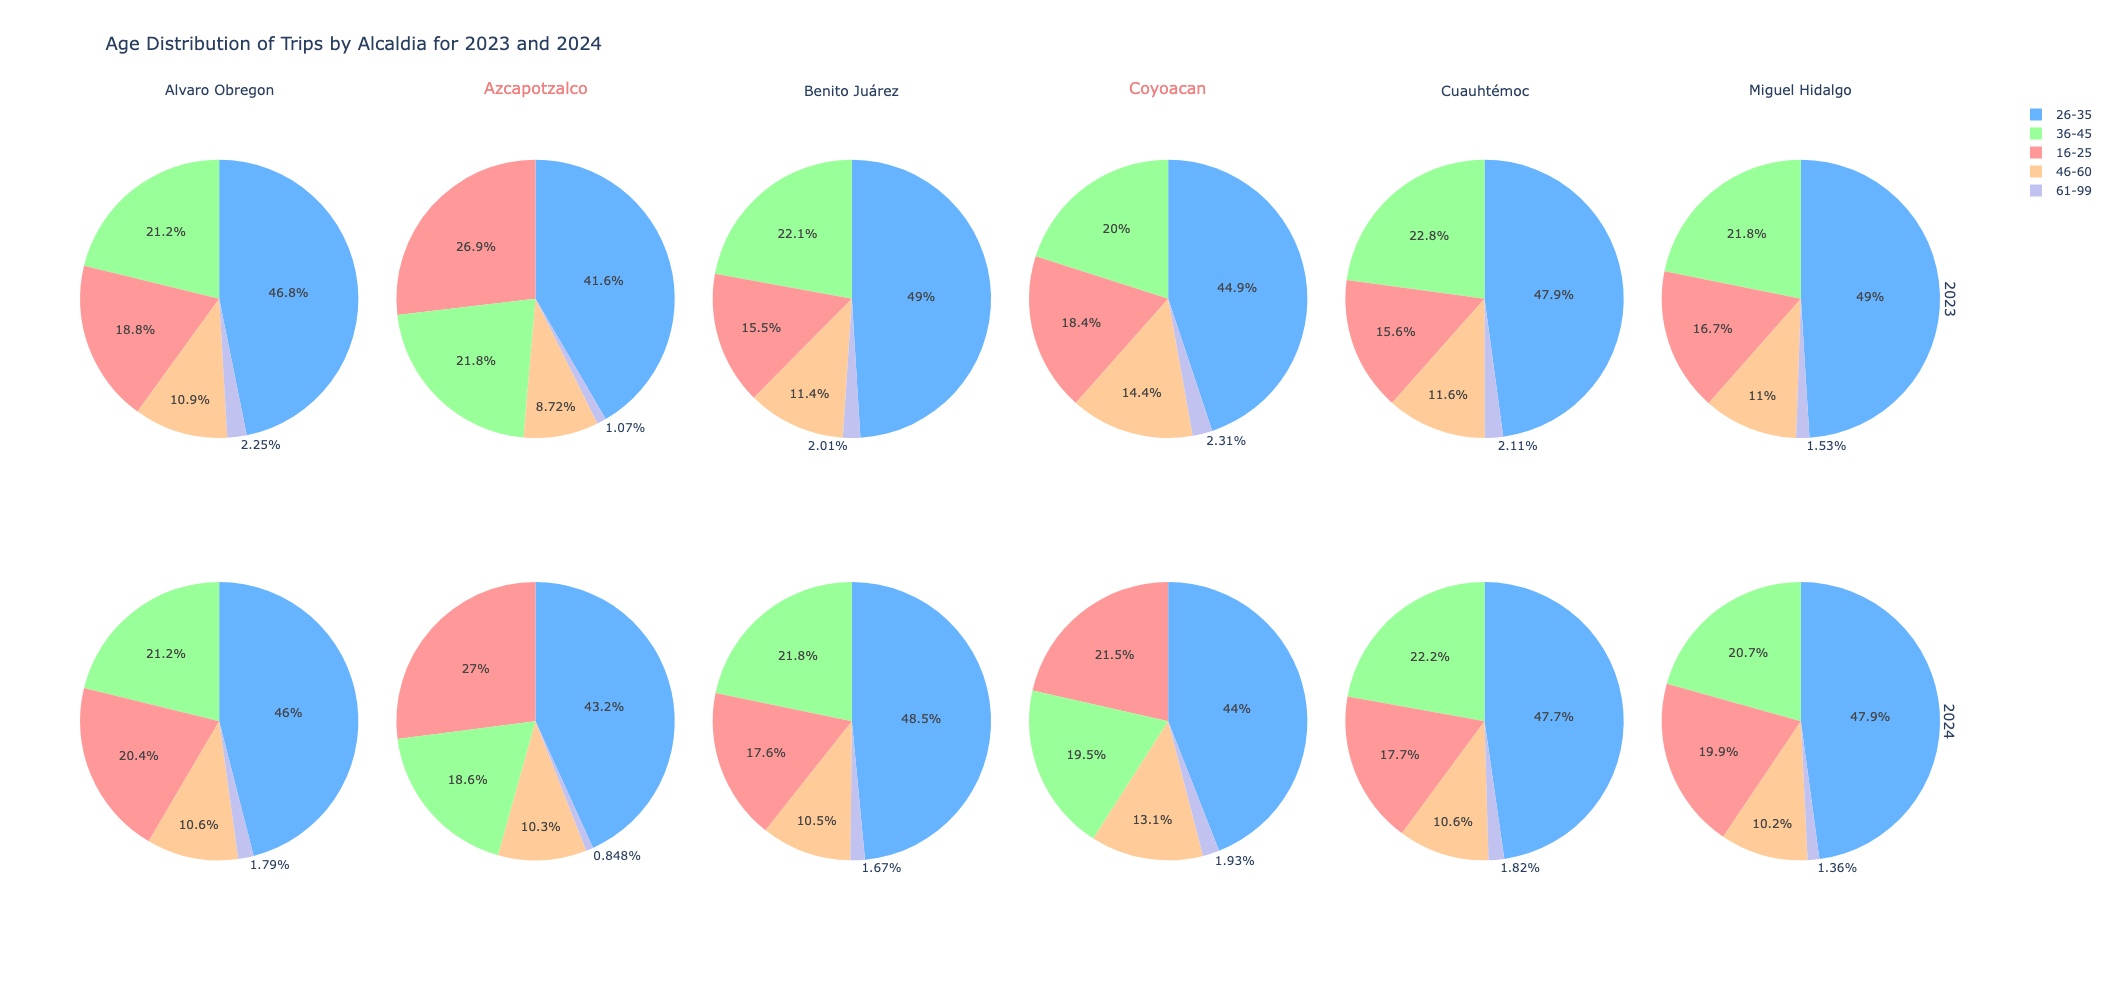

### Across all alcaldias, there's a trend of higher population counts for adults under 45
### Benito Juarez and Cuauhtemoc have the highest percentage of ages 26-35 which is also the age group that domninates every single alcaldia 
### Overall the Top 3 age groups for every alacadlia in order from most is 26-35, 36-45 and 16-25
### Azcapotzalco shows a higher percentage of young adults 16-25 for both 2023 and 2024
### Coyoacan shows an increase in young adults 16-25 for 2024 
### Making 16-25 age group the second with most trips for Azcapotzalco and Coyoacan
### This indicates a potentail higher population of young adults in these colonias due to many factors
### More data is needed to determine why but can be a great targetting strategy for this demographic for the mentioned alcaldias

In [240]:
avg_trip_duration_alcaldias = data_2023.groupby(['Alcaldia', 'Year'])['Trip_Duration'].mean().reset_index()
print(avg_trip_duration_alcaldias)
print("=" * 40)

         Alcaldia  Year  Trip_Duration
0  Alvaro Obregon  2023      18.106063
1    Azcapotzalco  2023      19.537510
2   Benito Juárez  2023      15.151499
3        Coyoacan  2023      18.173965
4      Cuauhtémoc  2023      15.374862
5  Miguel Hidalgo  2023      16.837377


In [241]:
avg_trip_duration_alcaldias = data_2024.groupby(['Alcaldia', 'Year'])['Trip_Duration'].mean().reset_index()
print(avg_trip_duration_alcaldias)
print("=" * 40)

         Alcaldia  Year  Trip_Duration
0  Alvaro Obregon  2024      17.714660
1    Azcapotzalco  2024      16.930990
2   Benito Juárez  2024      14.579546
3        Coyoacan  2024      15.394648
4      Cuauhtémoc  2024      15.415875
5  Miguel Hidalgo  2024      16.565589


In [ ]:
# Assuming you already have avg_trip_duration_alcaldias DataFrame
avg_trip_duration_alcaldias = merged_2023_2024_stations.groupby(['Alcaldia', 'Year'])['Trip_Duration'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(
    avg_trip_duration_alcaldias,
    x='Alcaldia',              # x-axis: Alcaldia
    y='Trip_Duration',         # y-axis: Average Trip Duration
    color='Alcaldia',          # Color by Alcaldia
    facet_col='Year',          # Create separate columns for each year
    title='Average Trip Duration by Alcaldia for 2023 and 2024',
    labels={'Trip_Duration': 'Average Trip Duration (minutes)', 'Alcaldia': 'Alcaldia'},  # Axis labels
    height=600,  # Height of the figure
    width=1800,
    color_discrete_sequence=colors1
)

# Customize the layout
fig.update_layout(
    title_font_size=18,
    showlegend=False
)

# Update annotations for each facet title
for annotation in fig.layout.annotations:
    if 'Year' in annotation.text:
        year = annotation.text.split('=')[-1]
        annotation.update(
            text=f'{year}',  # Custom text for each facet title
            font=dict(size=14)
        )
        
# Show the plot
fig.show()

# Create a bar chart using Plotly Express
fig = px.bar(
    alcaldia_station_counts_by_year,
    x='Alcaldia',              # x-axis: Alcaldia
    y='Distinct_Pickup_Station_ID',  # y-axis: Count of Pickup_Station_ID
    color='Alcaldia',          # Color by Alcaldia
    facet_col='Year',          # Create separate columns for each year
    title='Count of Pickup Stations by Alcaldia for 2023 and 2024',
    labels={'Pickup_Station_Count': 'Count of Pickup Stations', 'Alcaldia': 'Alcaldia'},  # Axis labels
    height=600,  # Height of the figure
    width=1800,
    color_discrete_sequence=colors1
)

# Customize the layout
fig.update_layout(
    title_font_size=18,
    showlegend=False
)

# Update annotations for each facet title
for annotation in fig.layout.annotations:
    if 'Year' in annotation.text:
        year = annotation.text.split('=')[-1]
        annotation.update(
            text=f'{year}',  # Custom text for each facet title
            font=dict(size=14)
        )

# Show the plot
fig.show()


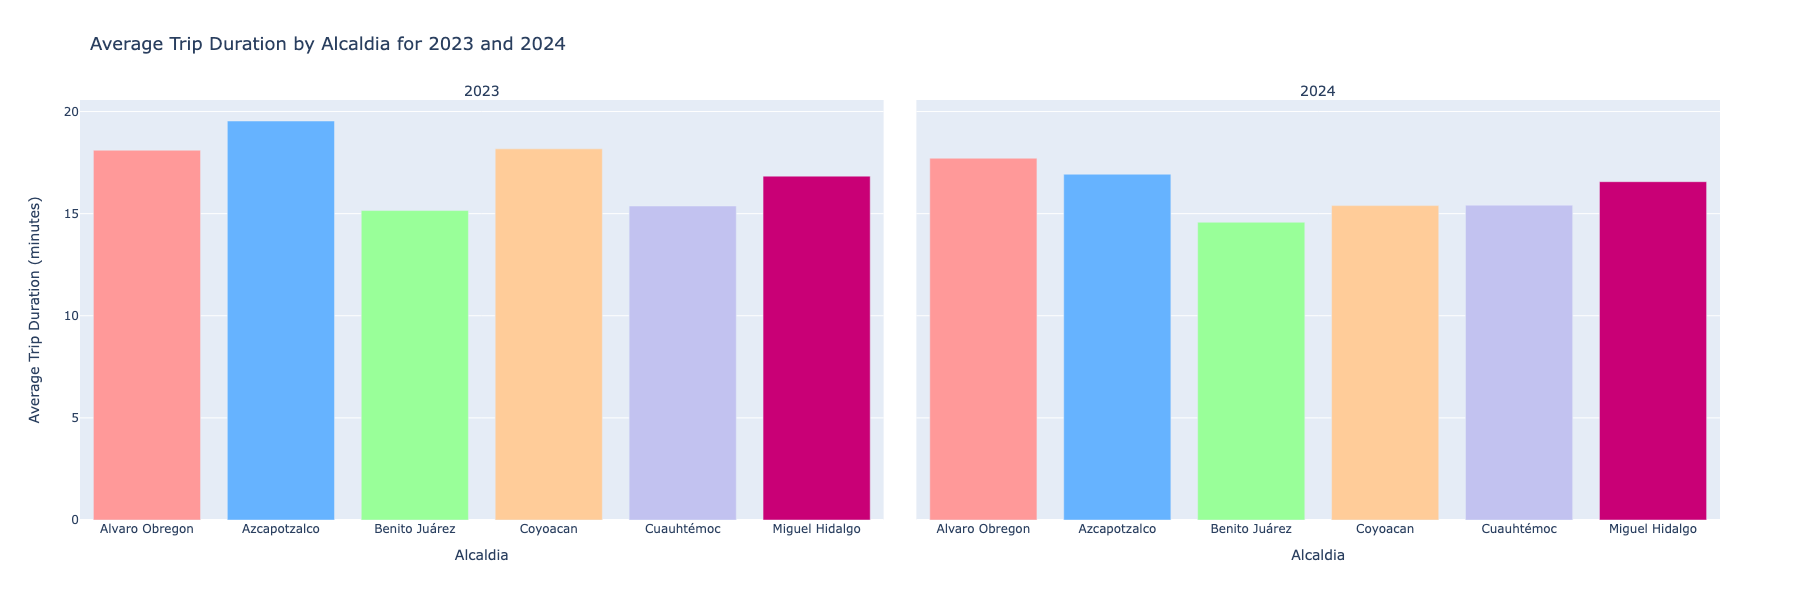

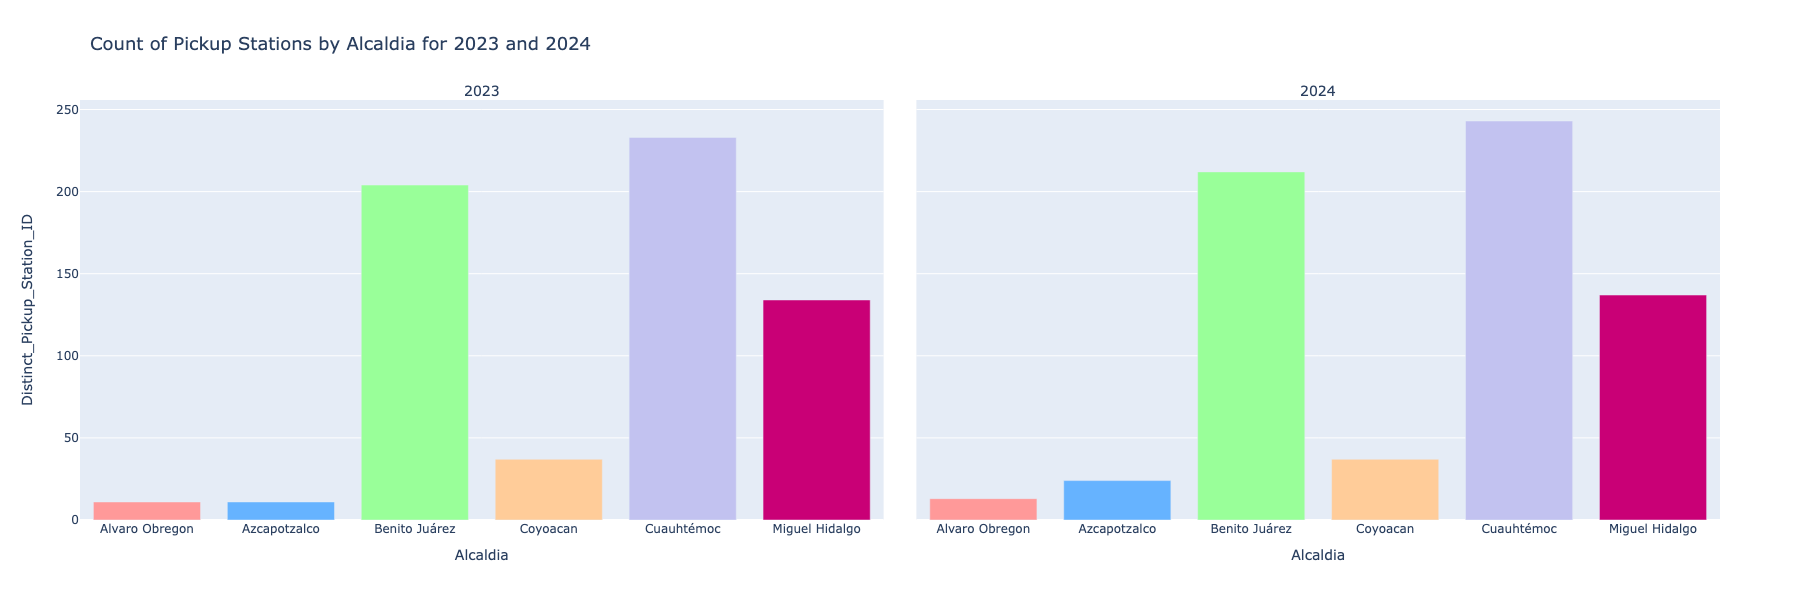

### Alcaldias with the highest trip durations are Azcapotzalco and Alvaro Obregon
### Which are the Alcadlias with the least number of bike stations and least number of trips for both years
### This which may be the reason for high trip duration avgs since people have to ride longer distances to return bikes since there arent as many stations 
### Benito Juarez and Cuauhtemoc are the alcaldias with the most stations and trips taken but have the lowest recorded trip duration for both years

In [244]:
merged_data = pd.merge(avg_trip_duration_alcaldias, alcaldia_station_counts_by_year, on=['Alcaldia', 'Year'])

# Step 4: Compute the correlation
correlation = merged_data['Trip_Duration'].corr(merged_data['Distinct_Pickup_Station_ID'])

print("Correlation between Average Trip Duration and Pickup Station Count:", correlation)

Correlation between Average Trip Duration and Pickup Station Count: -0.7831838181973793


In [ ]:
fig = px.scatter(
    merged_data,
    x='Distinct_Pickup_Station_ID',
    y='Trip_Duration',
    color='Alcaldia',
    color_discrete_sequence=colors1,
    title='Correlation between Average Trip Duration and Pickup Station Count',
    labels={'Distinct_Pickup_Station_ID': 'Pickup Station Count', 'Trip_Duration': 'Average Trip Duration (minutes)'},
    trendline='ols',
    trendline_scope="overall"# Add a trendline for better visualization
)

# Show the plot
fig.show()

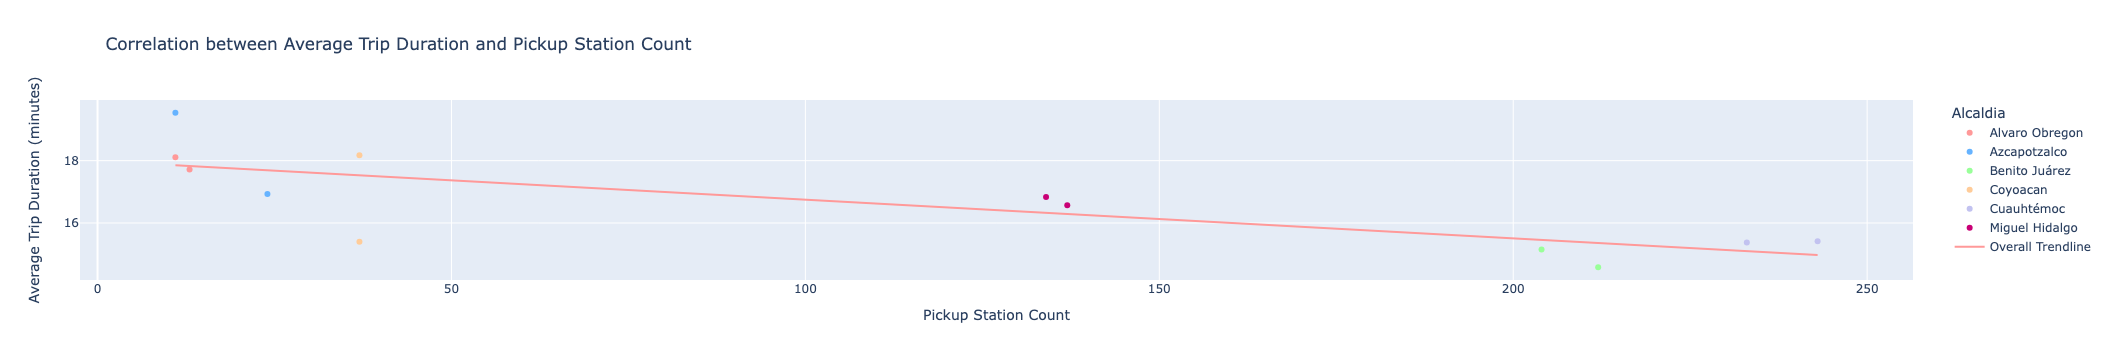

### The correlation coefficient of −0.783 between Average Trip Duration and Pickup Station Count suggests a strong negative relationship between the two variables
### This indicates that as the number of pickup station IDs increases, the average trip duration tends to decrease, and vice versa.

In [ ]:
avg_trip_duration_month = data_2023.groupby(['Alcaldia', 'Month'])['Trip_Duration'].mean().reset_index()


# Plotting with Plotly Express facet_wrap and grouped bars
fig = px.bar(avg_trip_duration_month, x='Month', y='Trip_Duration', color='Alcaldia',
             title='Average Trip Duration by Alcaldia (Monthly Analysis) 2023',
             labels={'Trip_Duration': 'Average Trip Duration', 'Month': 'Month'},
             barmode='group',
             height=500,
             color_discrete_sequence=colors1)

# Update layout
fig.update_layout(height=800, showlegend=True)

# Update x-axis ticks to show month names
fig.update_xaxes(tickmode='array', tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


# Show the plot
fig.show()

avg_trip_duration_month_2024 = data_2024.groupby(['Alcaldia', 'Month'])['Trip_Duration'].mean().reset_index()


# Plotting with Plotly Express facet_wrap and grouped bars
fig = px.bar(avg_trip_duration_month_2024, x='Month', y='Trip_Duration', color='Alcaldia',
             title='Average Trip Duration by Alcaldia (Monthly Analysis) 2024',
             labels={'Trip_Duration': 'Average Trip Duration', 'Month': 'Month'},
             barmode='group',
             height=500,
             color_discrete_sequence=colors1)

# Update layout
fig.update_layout(height=800, showlegend=True)

# Update x-axis ticks to show month names
fig.update_xaxes(tickmode='array', tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
fig.show()

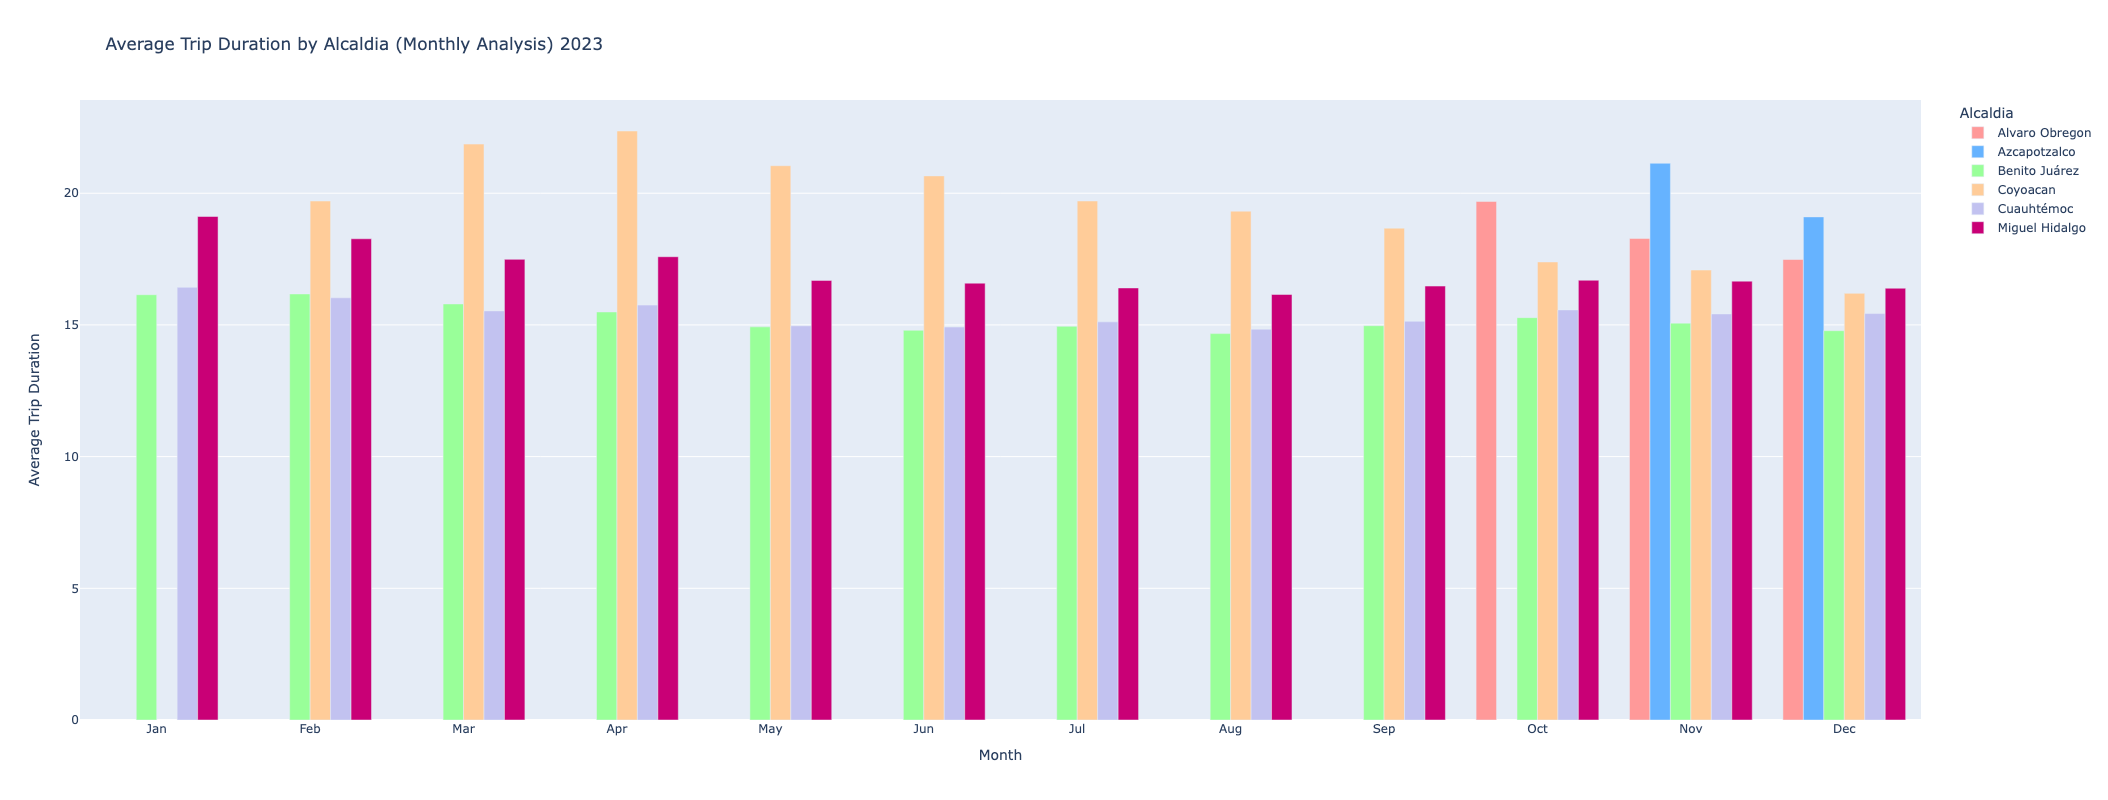

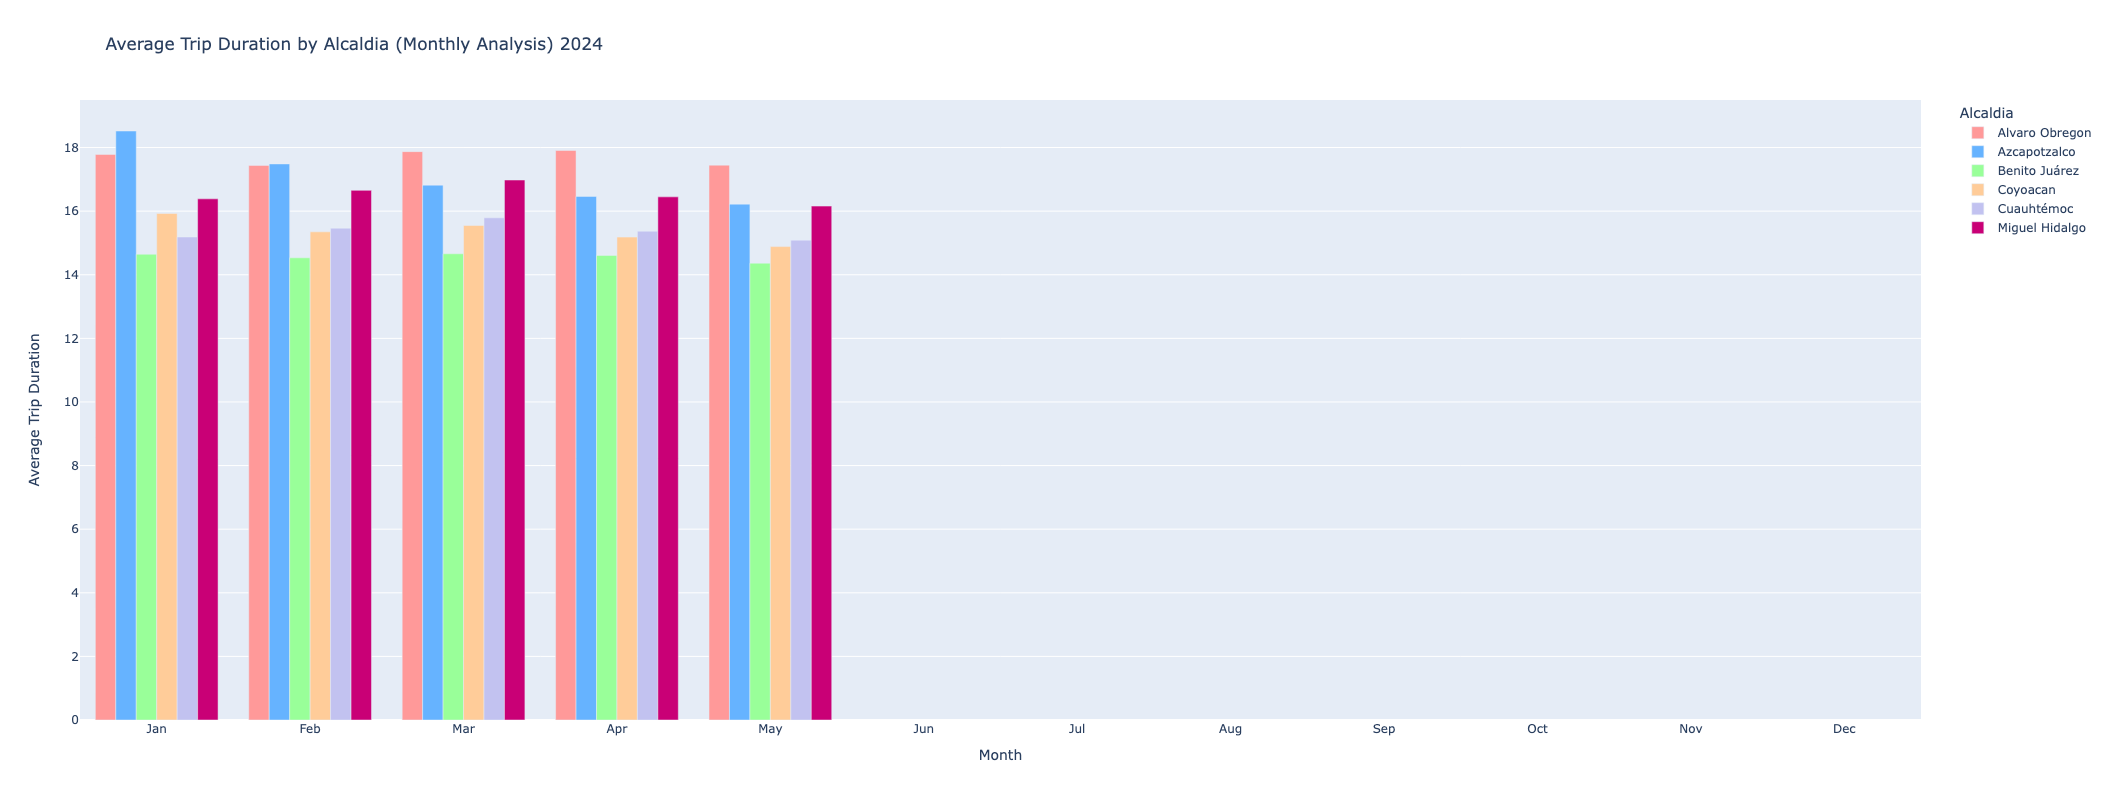

### Miguel Hidalgo maintains higher trip duration out of the big 3 alcaldias 
### Coyocan recorded the highest trip duration in April 2023 with 22.3 minutes
### Trip duration shows a decrease from April 2023 onward with a slight increase again in the last few months of the years
### 2024 starts with Azcapotzalco as the top alcaldia and decreases gradually within the next few months 

### Females dominate trip duration every single month for every alcaldia 
### Coyoacan recorded the highest trip length with 26.5 min
### Azcapotzalco shows the closest trip duration for both genders in 2024 out of all other colonias 

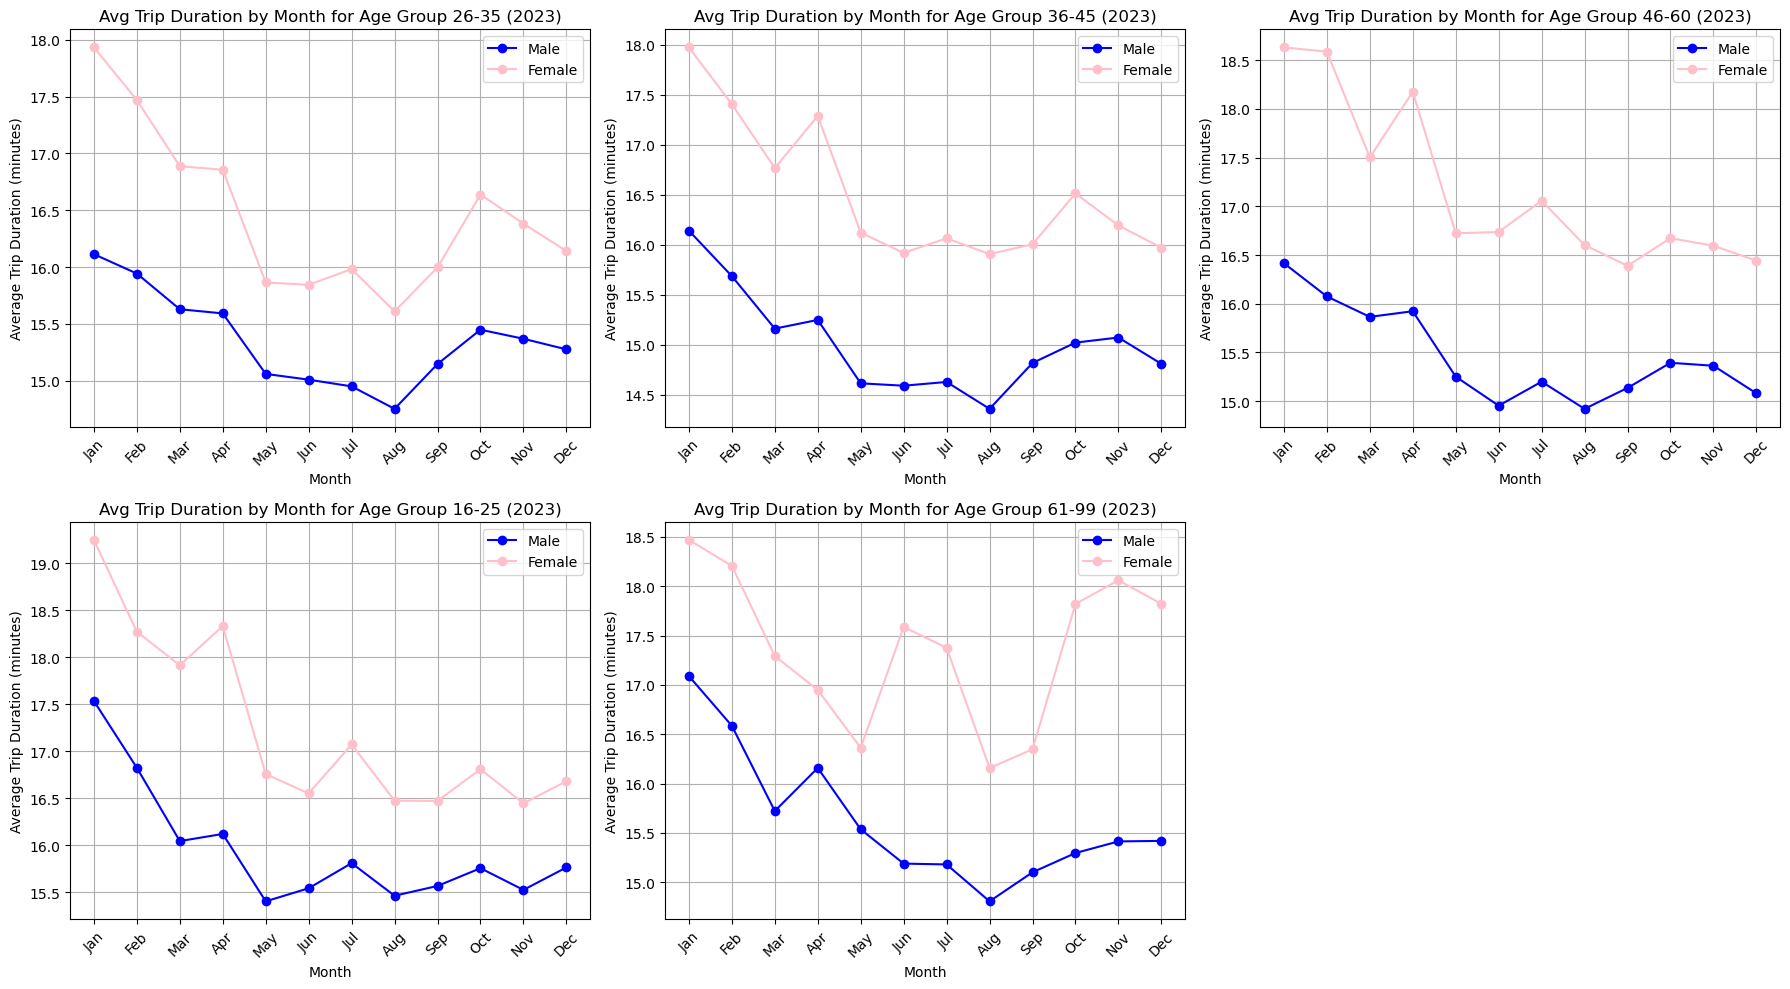

In [250]:
# Define the unique age groups
age_groups = data_2023['Age_Group'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 age groups)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each age group and create a separate plot
for i, age_group in enumerate(age_groups):
    # Filter data for the current age group
    age_data_2023 = data_2023[data_2023['Age_Group'] == age_group]

    # Group by month and gender to calculate the average trip duration
    avg_trip_duration_per_month_gender = age_data_2023.groupby(['Month', 'Gender'])['Trip_Duration'].mean().reset_index()

    # Plot data for Male
    male_data = avg_trip_duration_per_month_gender[avg_trip_duration_per_month_gender['Gender'] == 'M']
    axs[i].plot(male_data['Month'], male_data['Trip_Duration'], label='Male', marker='o', color='blue')

    # Plot data for Female
    female_data = avg_trip_duration_per_month_gender[avg_trip_duration_per_month_gender['Gender'] == 'F']
    axs[i].plot(female_data['Month'], female_data['Trip_Duration'], label='Female', marker='o', color='pink')

    # Add labels and legend
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Average Trip Duration (minutes)')
    axs[i].set_title(f'Avg Trip Duration by Month for Age Group {age_group} (2023)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show month names
for ax in axs:
    ax.set_xticks(range(1, 13))  # Set the x-ticks to show months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names

fig.delaxes(axs[-1])

# Adjust layout
plt.tight_layout()
plt.show()

### Each age group shows similar behavior for every month
### Female age group 61-99 showed peaks every 5 months while males declined to august and then a gradual increase towards the end of the year
### Overall it seems regardless of gender or age, May - August are the months with lower trip durations

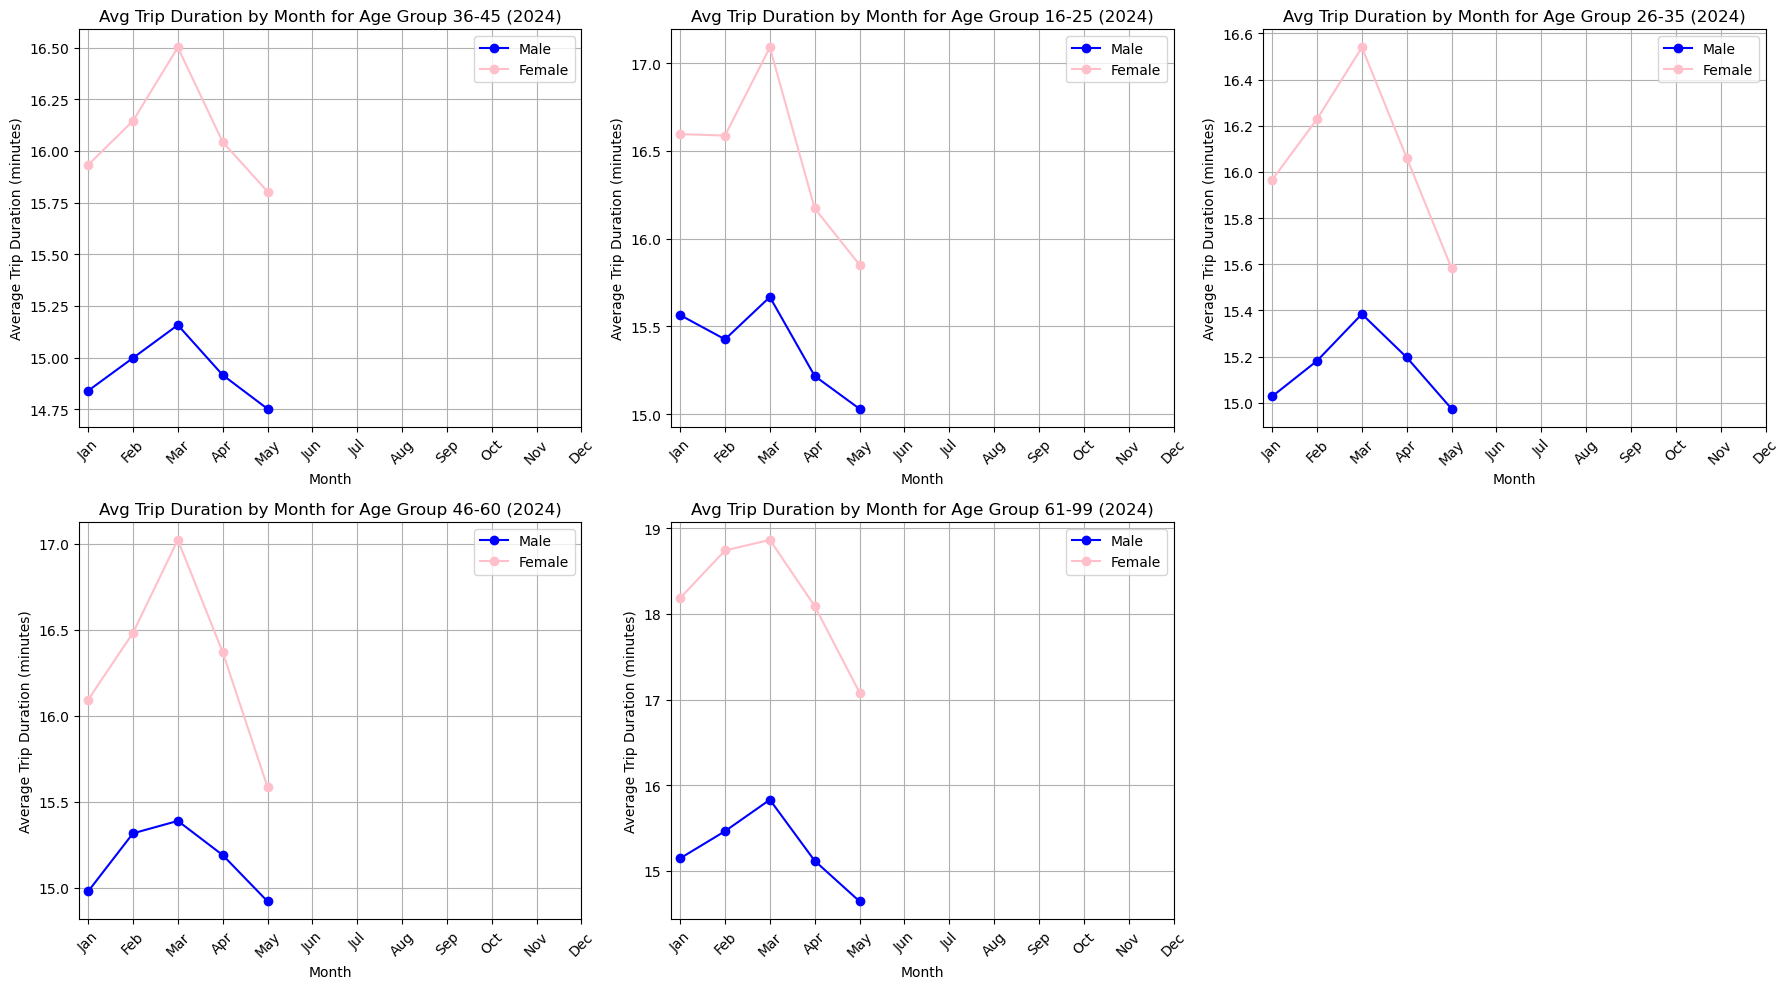

In [252]:
# Define the unique age groups
age_groups = data_2024['Age_Group'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 age groups)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each age group and create a separate plot
for i, age_group in enumerate(age_groups):
    # Filter data for the current age group
    age_data_2024 = data_2024[data_2024['Age_Group'] == age_group]

    # Group by month and gender to calculate the average trip duration
    avg_trip_duration_per_month_gender = age_data_2024.groupby(['Month', 'Gender'])['Trip_Duration'].mean().reset_index()

    # Plot data for Male
    male_data = avg_trip_duration_per_month_gender[avg_trip_duration_per_month_gender['Gender'] == 'M']
    axs[i].plot(male_data['Month'], male_data['Trip_Duration'], label='Male', marker='o', color='blue')

    # Plot data for Female
    female_data = avg_trip_duration_per_month_gender[avg_trip_duration_per_month_gender['Gender'] == 'F']
    axs[i].plot(female_data['Month'], female_data['Trip_Duration'], label='Female', marker='o', color='pink')

    # Add labels and legend
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Average Trip Duration (minutes)')
    axs[i].set_title(f'Avg Trip Duration by Month for Age Group {age_group} (2024)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show month names
for ax in axs:
    ax.set_xticks(range(1, 13))  # Set the x-ticks to show months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names

fig.delaxes(axs[-1])

# Adjust layout
plt.tight_layout()
plt.show()

### 2024 shows a drop in duration from march forward accross all ages and gender

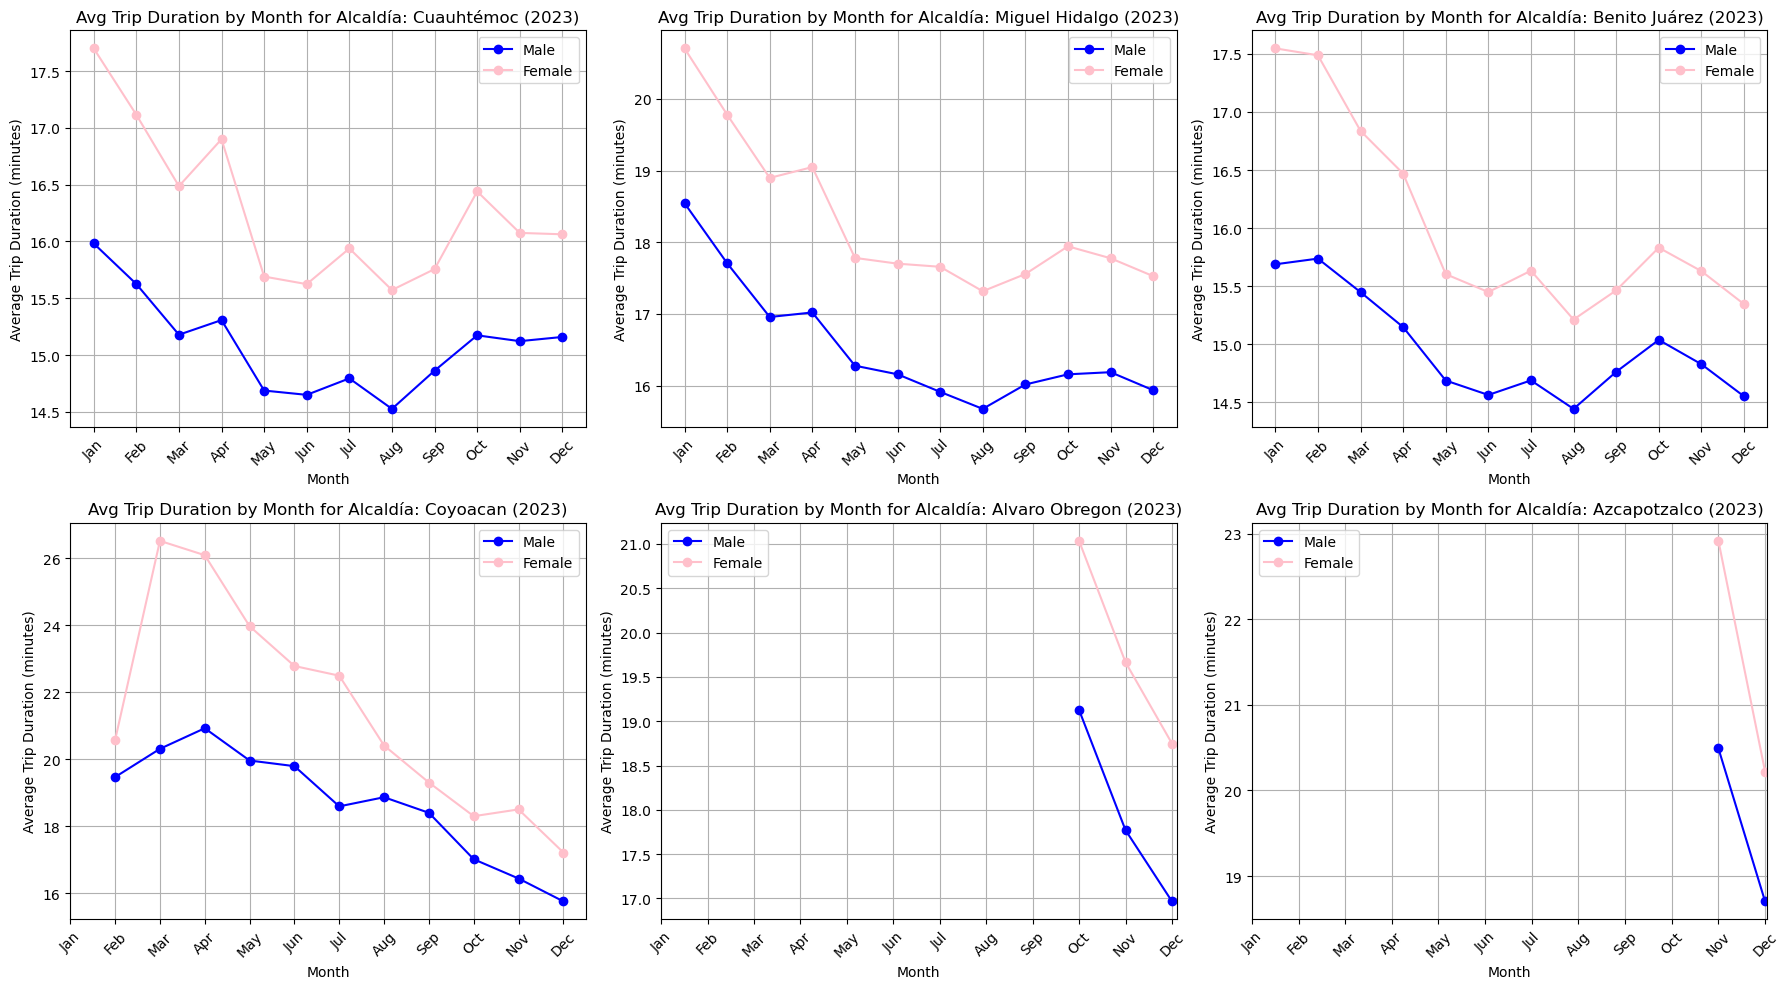

In [254]:
# Define the unique Alcaldias
alcaldias = data_2023['Alcaldia'].unique()

# Set up subplots with 3 columns and 2 rows (total 6 Alcaldias)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each Alcaldia and create a separate plot
for i, alcaldia in enumerate(alcaldias):
    # Filter data for the current Alcaldia
    alcaldia_data_2023 = data_2023[data_2023['Alcaldia'] == alcaldia]

    # Group by month and gender to calculate the average trip duration
    avg_trip_duration_per_month_gender = alcaldia_data_2023.groupby(['Month', 'Gender'])['Trip_Duration'].mean().reset_index()

    # Plot data for Male
    male_data = avg_trip_duration_per_month_gender[avg_trip_duration_per_month_gender['Gender'] == 'M']
    axs[i].plot(male_data['Month'], male_data['Trip_Duration'], label='Male', marker='o', color='blue')

    # Plot data for Female
    female_data = avg_trip_duration_per_month_gender[avg_trip_duration_per_month_gender['Gender'] == 'F']
    axs[i].plot(female_data['Month'], female_data['Trip_Duration'], label='Female', marker='o', color='pink')

    # Add labels and legend
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Average Trip Duration (minutes)')
    axs[i].set_title(f'Avg Trip Duration by Month for Alcaldía: {alcaldia} (2023)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show month names
for ax in axs:
    ax.set_xticks(range(1, 13))  # Set the x-ticks to show months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names

# Adjust layout
plt.tight_layout()
plt.show()

### Females lead trip duration every single month for every alcaldia 
### Coyoacan recorded the highest tip length with 26.5 min
### Azcapotzalco shows the closest trip duration for both genders in 2024 out of all other colonias 
### August rrecords the lowest trip duration acoress all alcaldias for both genders except for Coyoacan 
### Coyoacan decreases each month until december reaching the lowest trip duration for both genders

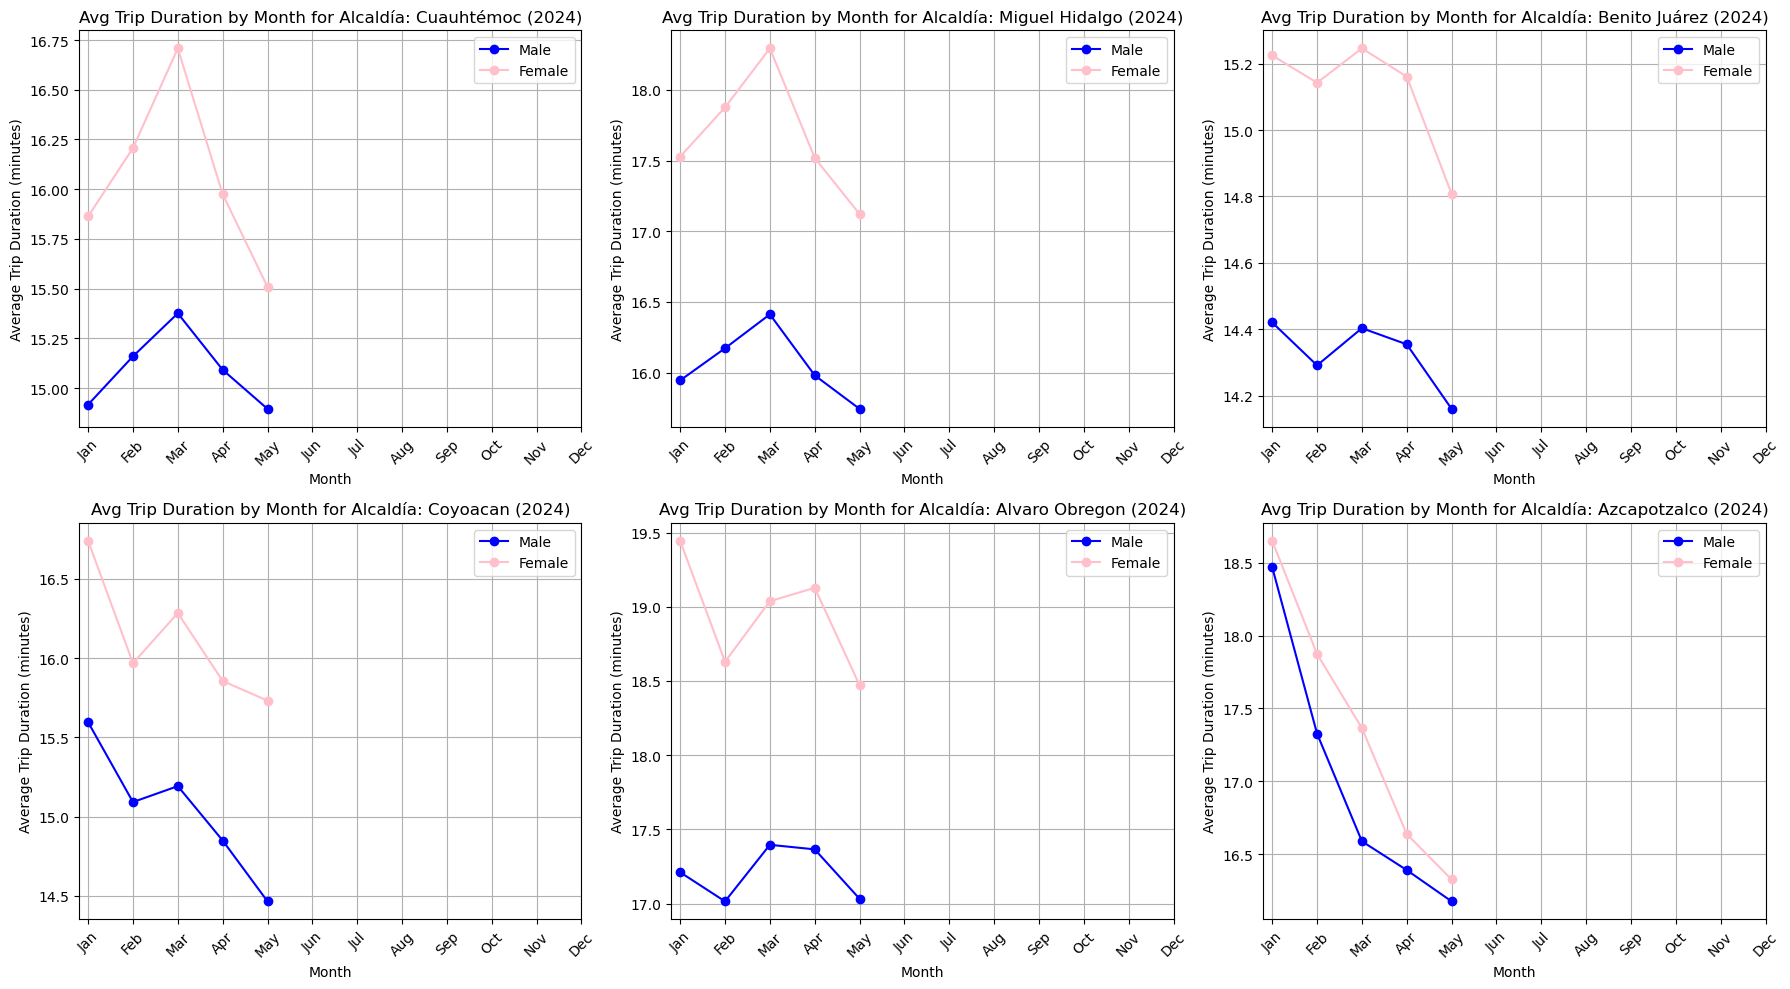

In [256]:
# Define the unique Alcaldias
alcaldias = data_2024['Alcaldia'].unique()

# Set up subplots with 3 columns and 2 rows (total 6 Alcaldias)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each Alcaldia and create a separate plot
for i, alcaldia in enumerate(alcaldias):
    # Filter data for the current Alcaldia
    alcaldia_data_2024 = data_2024[data_2024['Alcaldia'] == alcaldia]

    # Group by month and gender to calculate the average trip duration
    avg_trip_duration_per_month_gender = alcaldia_data_2024.groupby(['Month', 'Gender'])['Trip_Duration'].mean().reset_index()

    # Plot data for Male
    male_data = avg_trip_duration_per_month_gender[avg_trip_duration_per_month_gender['Gender'] == 'M']
    axs[i].plot(male_data['Month'], male_data['Trip_Duration'], label='Male', marker='o', color='blue')

    # Plot data for Female
    female_data = avg_trip_duration_per_month_gender[avg_trip_duration_per_month_gender['Gender'] == 'F']
    axs[i].plot(female_data['Month'], female_data['Trip_Duration'], label='Female', marker='o', color='pink')

    # Add labels and legend
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Average Trip Duration (minutes)')
    axs[i].set_title(f'Avg Trip Duration by Month for Alcaldía: {alcaldia} (2024)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show month names
for ax in axs:
    ax.set_xticks(range(1, 13))  # Set the x-ticks to show months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names

# Adjust layout
plt.tight_layout()
plt.show()

### Azcapotzalco displays the closest trip duration averages for both genders 
### All alcaldias show a decline heading towards june

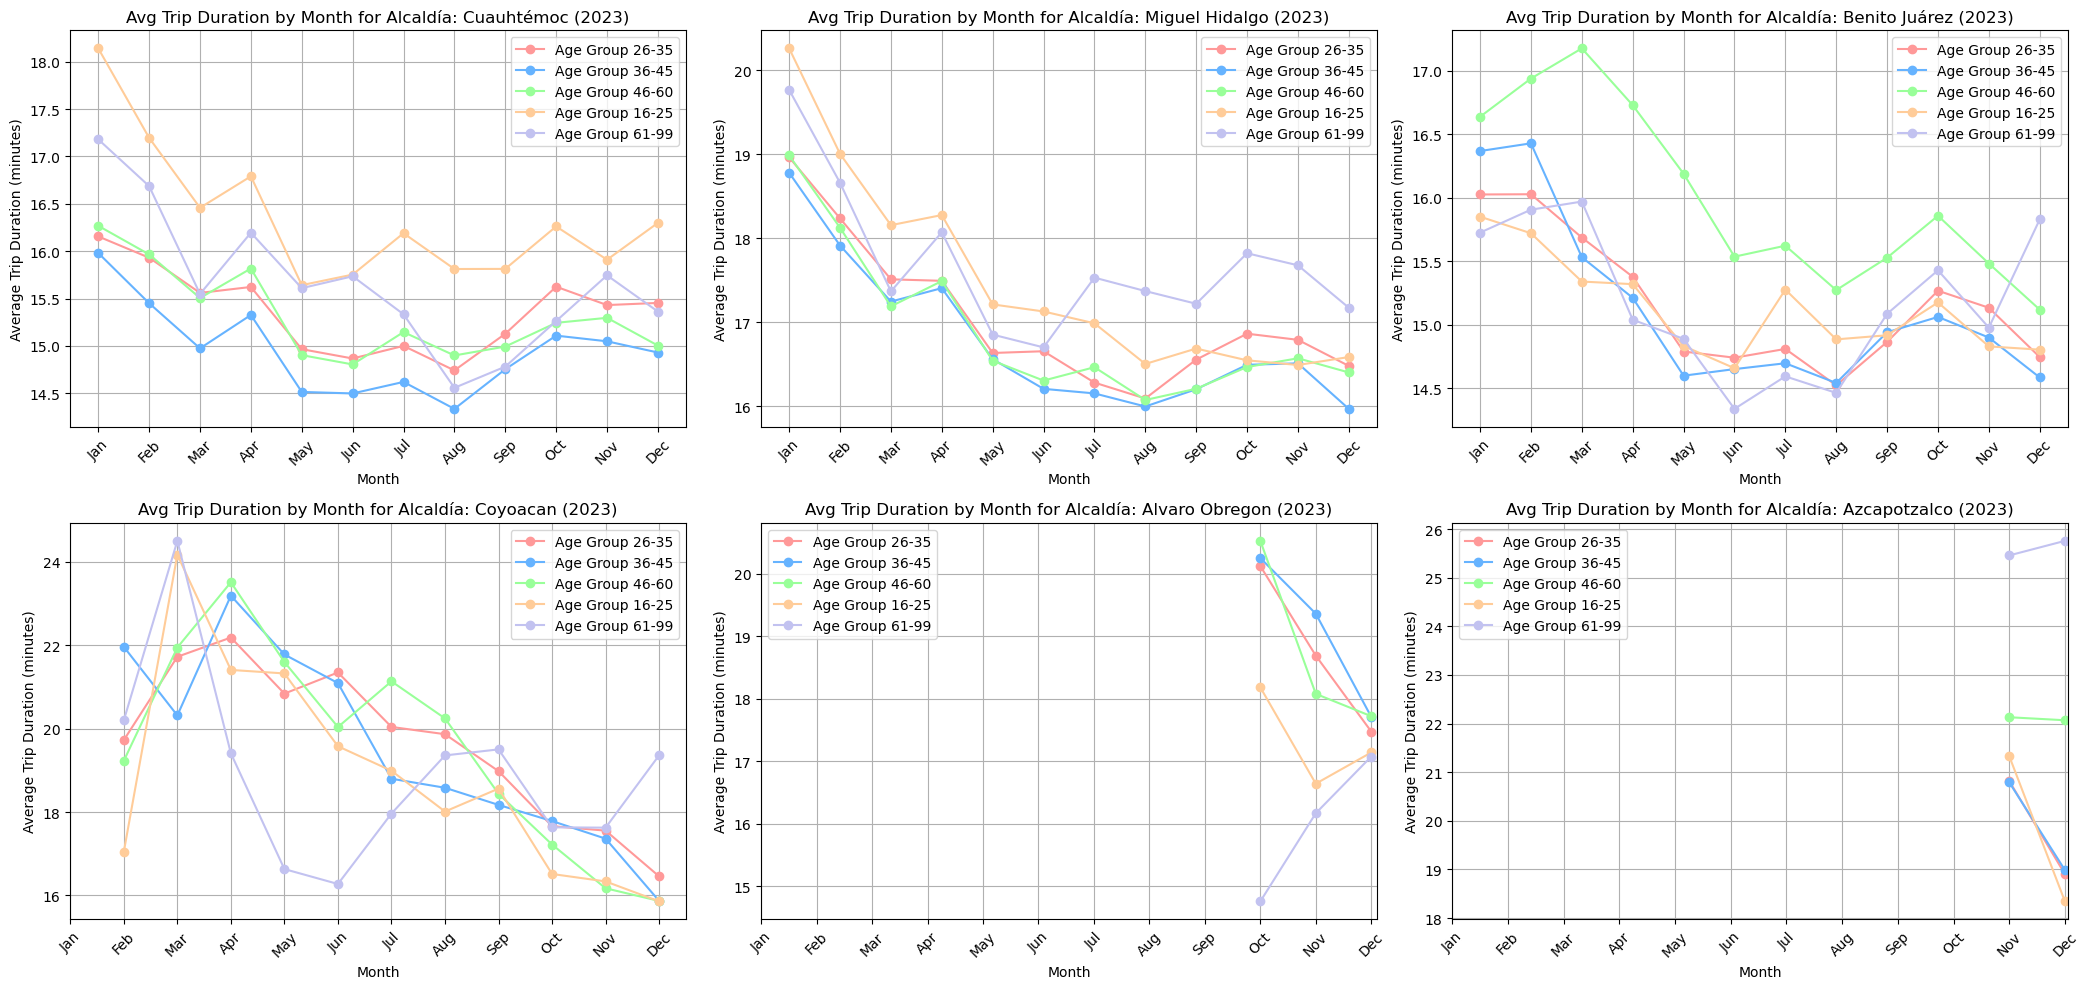

In [258]:
# Define the unique Alcaldias and Age Groups
alcaldias = data_2023['Alcaldia'].unique()
age_groups = data_2023['Age_Group'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 Alcaldias)
fig, axs = plt.subplots(2, 3, figsize=(21, 10))  # Updated layout

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Create a dictionary to map each age group to a specific color
color_dict = {age_group: colors[i] for i, age_group in enumerate(age_groups)}

# Iterate over each Alcaldia and create a separate plot
for i, alcaldia in enumerate(alcaldias):
    # Filter data for the current Alcaldia
    alcaldia_data_2023 = data_2023[data_2023['Alcaldia'] == alcaldia]

    # Group by month and age group to calculate the average trip duration
    avg_trip_duration_per_month_age = alcaldia_data_2023.groupby(['Month', 'Age_Group'])['Trip_Duration'].mean().reset_index()

    # Plot data for each Age Group
    for age_group in age_groups:
        group_data = avg_trip_duration_per_month_age[avg_trip_duration_per_month_age['Age_Group'] == age_group]
        axs[i].plot(group_data['Month'], group_data['Trip_Duration'], label=f'Age Group {age_group}', marker='o', color=color_dict[age_group])

    # Add labels and legend
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Average Trip Duration (minutes)')
    axs[i].set_title(f'Avg Trip Duration by Month for Alcaldía: {alcaldia} (2023)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show month names
for ax in axs:
    ax.set_xticks(range(1, 13))  # Set the x-ticks to show months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names

# Adjust layout
plt.tight_layout()
plt.show()

### The big 3 alcaldias show low trip durations for all ages for the months between may - august
### Benito Juarez is led by age group 46-60 while cuauhtemoc is led by 16-25 age group 
### Coyoacan shows different age groups leading for different months while alo showing a decilne from the start of the year to the end of the year

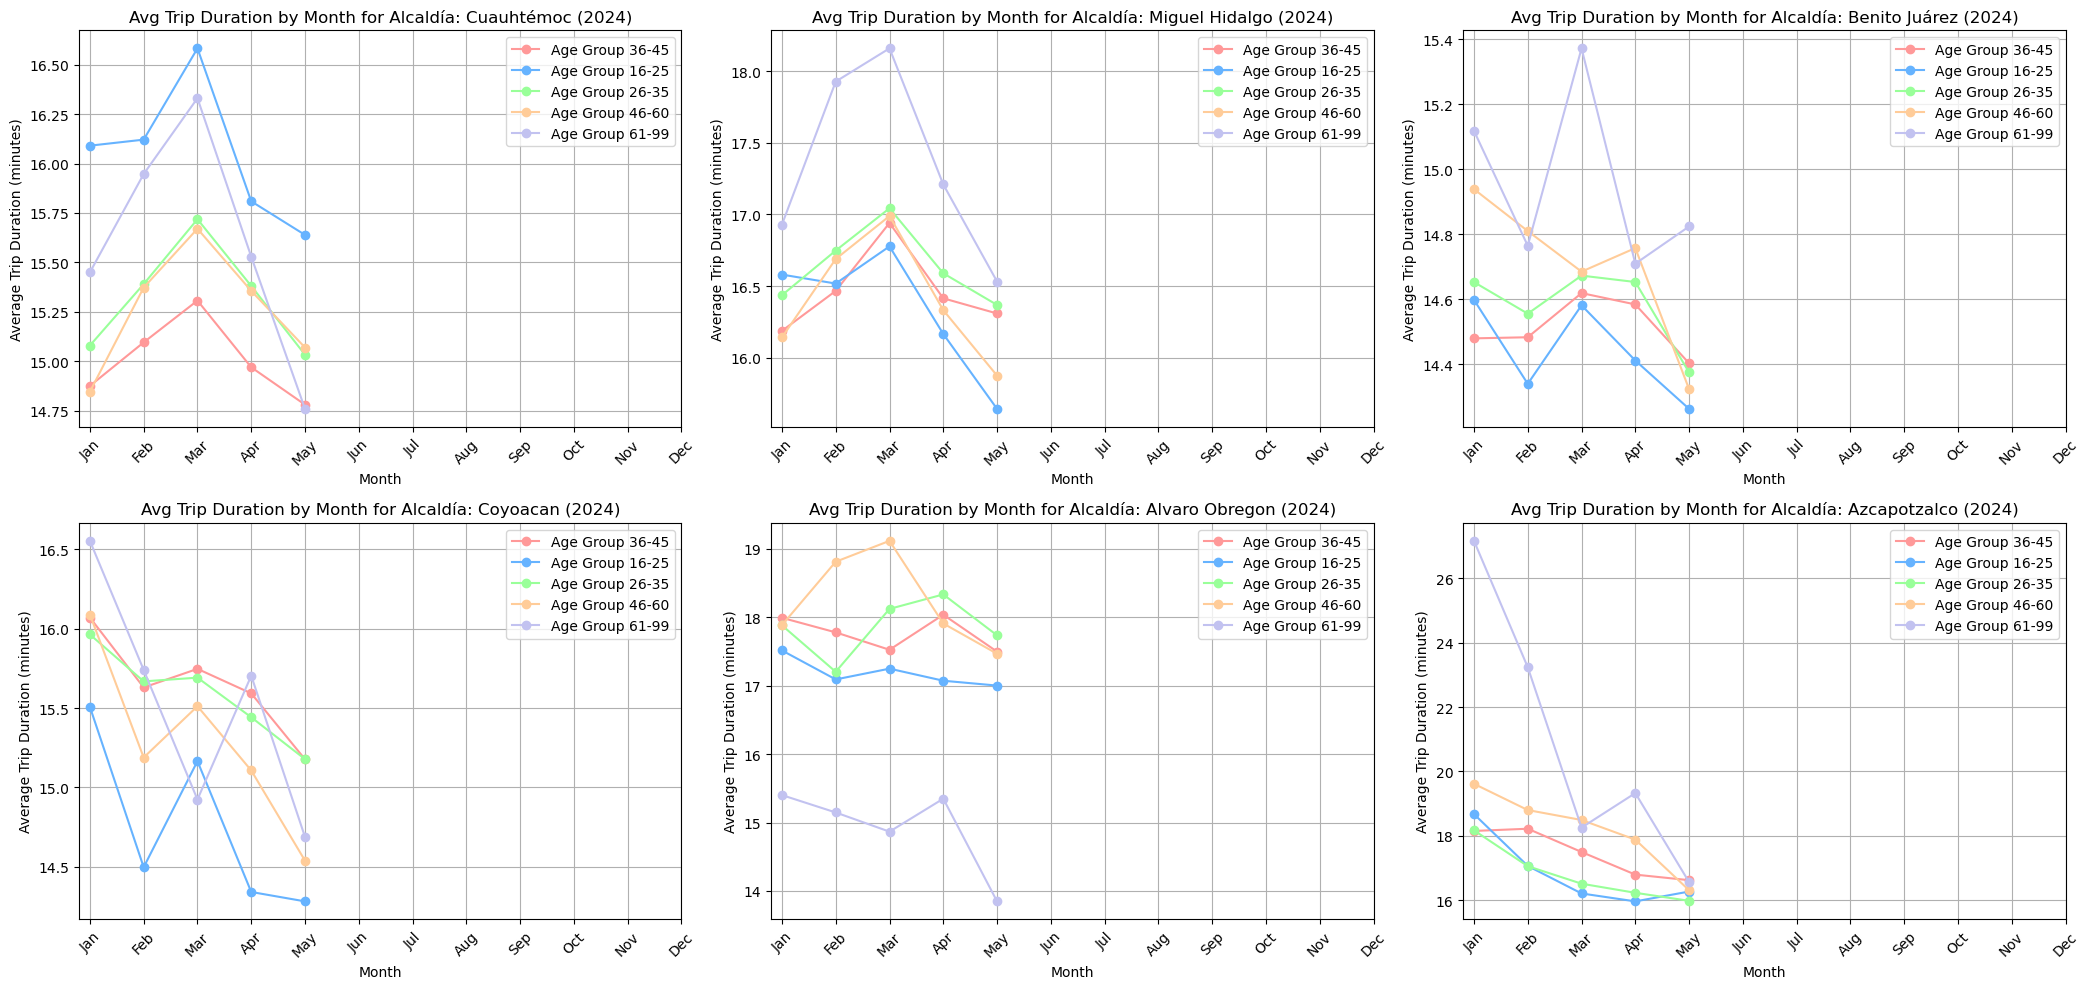

In [260]:
# Define the unique Alcaldias and Age Groups
alcaldias = data_2024['Alcaldia'].unique()
age_groups = data_2024['Age_Group'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 Alcaldias)
fig, axs = plt.subplots(2, 3, figsize=(21, 10))  # Updated layout

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Create a dictionary to map each age group to a specific color
color_dict = {age_group: colors[i] for i, age_group in enumerate(age_groups)}

# Iterate over each Alcaldia and create a separate plot
for i, alcaldia in enumerate(alcaldias):
    # Filter data for the current Alcaldia
    alcaldia_data_2024 = data_2024[data_2024['Alcaldia'] == alcaldia]

    # Group by month and age group to calculate the average trip duration
    avg_trip_duration_per_month_age = alcaldia_data_2024.groupby(['Month', 'Age_Group'])['Trip_Duration'].mean().reset_index()

    # Plot data for each Age Group
    for age_group in age_groups:
        group_data = avg_trip_duration_per_month_age[avg_trip_duration_per_month_age['Age_Group'] == age_group]
        axs[i].plot(group_data['Month'], group_data['Trip_Duration'], label=f'Age Group {age_group}', marker='o', color=color_dict[age_group])

    # Add labels and legend
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Average Trip Duration (minutes)')
    axs[i].set_title(f'Avg Trip Duration by Month for Alcaldía: {alcaldia} (2024)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show month names
for ax in axs:
    ax.set_xticks(range(1, 13))  # Set the x-ticks to show months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names

# Adjust layout
plt.tight_layout()
plt.show()

### Azcapotzalco shows the highest trip duration for may by age range 61-99
### Cuauhtemoc is led by 16-25 2024
### Miguel hidalgo is led by age group 61-99 2024
### Alvaro Obregon recorded the lowest duration for 61-99 age range with below 14min 

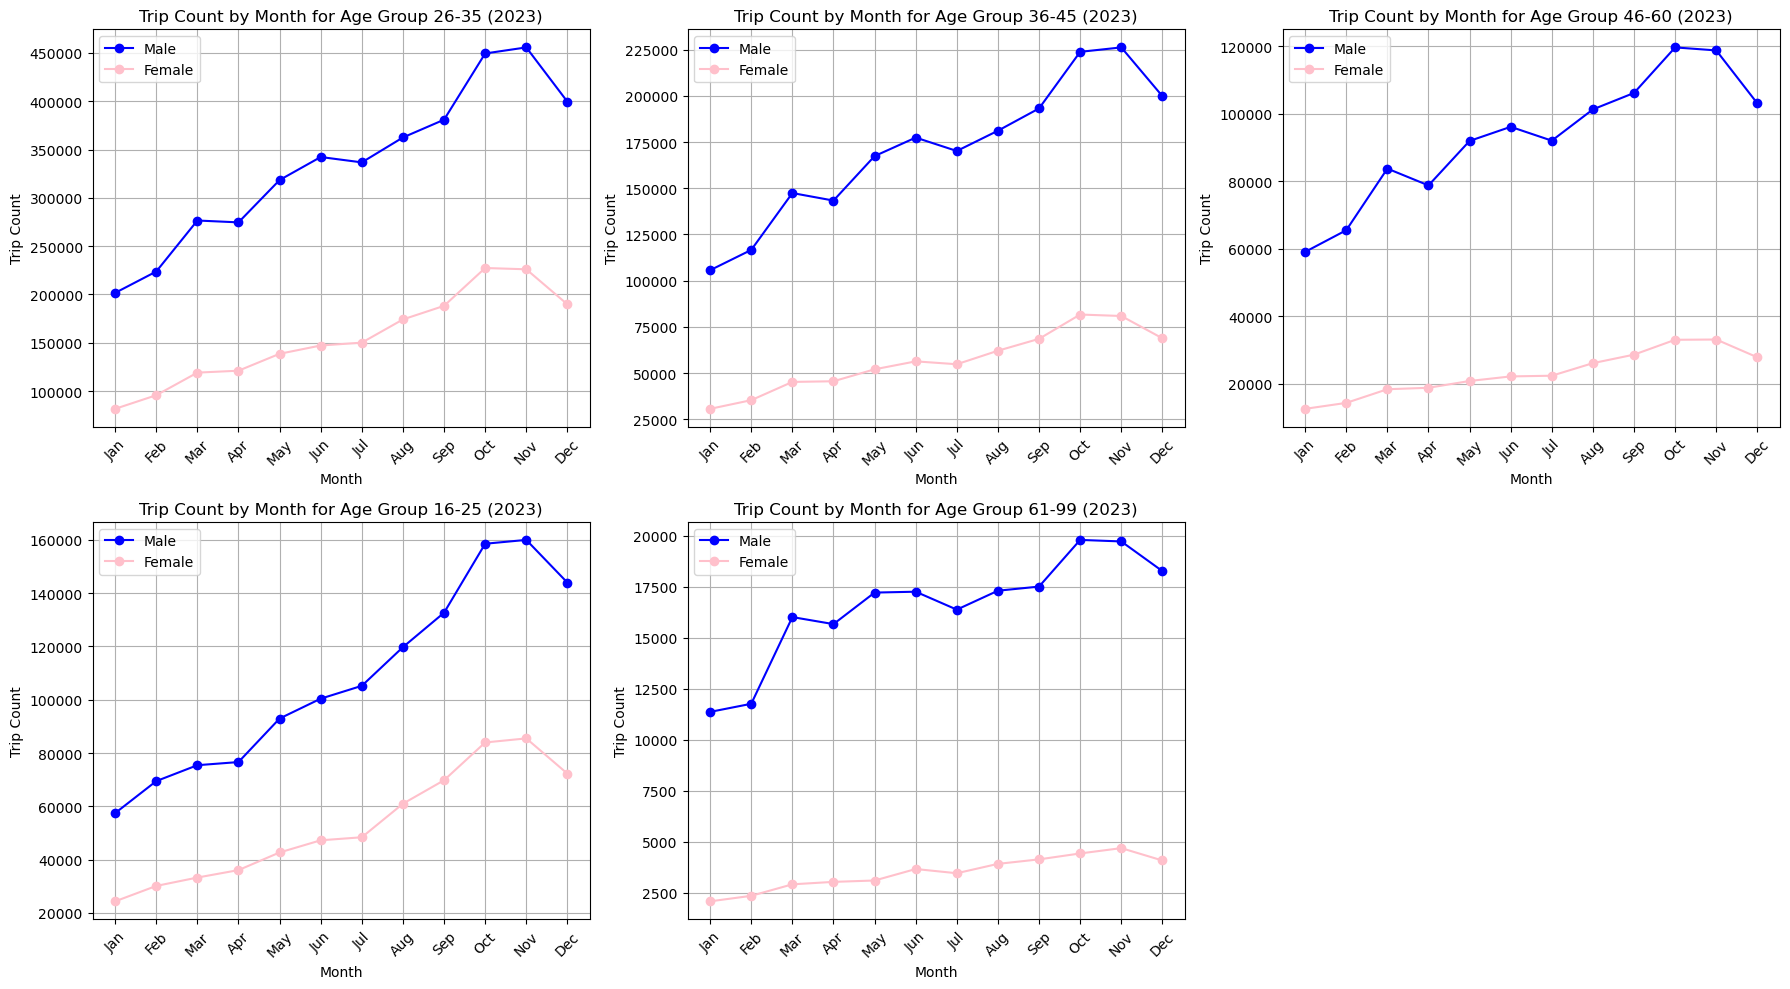

In [262]:
# Define the unique age groups
age_groups = data_2023['Age_Group'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 age groups)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each age group and create a separate plot
for i, age_group in enumerate(age_groups):
    # Filter data for the current age group
    age_data_2023 = data_2023[data_2023['Age_Group'] == age_group]

    # Group by month and gender to calculate the trip count
    trip_count_per_month_gender = age_data_2023.groupby(['Month', 'Gender']).size().reset_index(name='Trip_Count')

    # Plot data for Male
    male_data = trip_count_per_month_gender[trip_count_per_month_gender['Gender'] == 'M']
    axs[i].plot(male_data['Month'], male_data['Trip_Count'], label='Male', marker='o', color='blue')

    # Plot data for Female
    female_data = trip_count_per_month_gender[trip_count_per_month_gender['Gender'] == 'F']
    axs[i].plot(female_data['Month'], female_data['Trip_Count'], label='Female', marker='o', color='pink')

    # Add labels and legend
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Trip Count')
    axs[i].set_title(f'Trip Count by Month for Age Group {age_group} (2023)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show month names
for ax in axs:
    ax.set_xticks(range(1, 13))  # Set the x-ticks to show months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names

# Remove the last empty subplot
fig.delaxes(axs[-1])

# Adjust layout
plt.tight_layout()
plt.show()

### October and November are the months with the most trips taken for each gender across all age groups (2023)

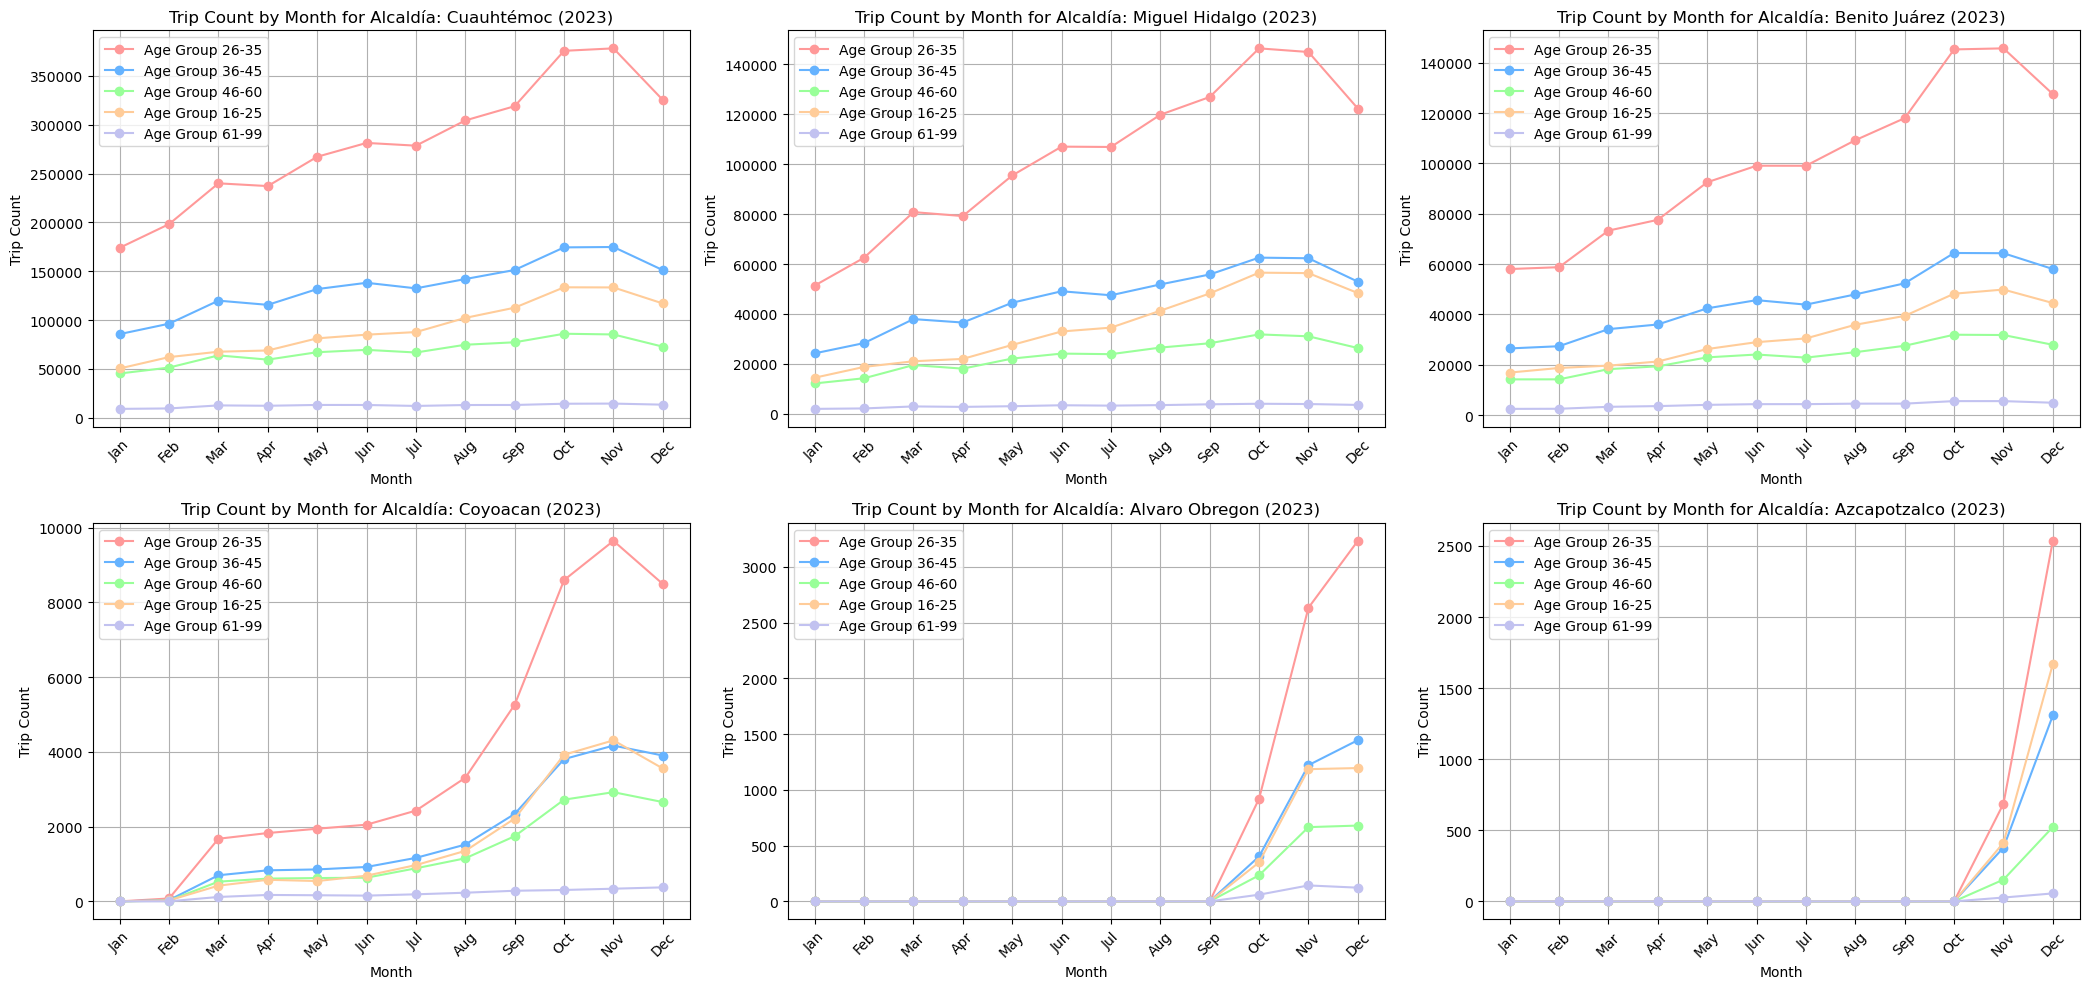

In [264]:
# Define the unique Alcaldias and Age Groups
alcaldias = data_2023['Alcaldia'].unique()
age_groups = data_2023['Age_Group'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 Alcaldias)
fig, axs = plt.subplots(2, 3, figsize=(21, 10))  # Updated layout

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Create a dictionary to map each age group to a specific color
color_dict = {age_group: colors[i] for i, age_group in enumerate(age_groups)}

# Iterate over each Alcaldia and create a separate plot
for i, alcaldia in enumerate(alcaldias):
    # Filter data for the current Alcaldia
    alcaldia_data_2023 = data_2023[data_2023['Alcaldia'] == alcaldia]

    # Group by month and age group to calculate the trip count
    trip_count_per_month_age = alcaldia_data_2023.groupby(['Month', 'Age_Group']).size().reset_index(name='Trip_Count')

    # Plot data for each Age Group
    for age_group in age_groups:
        group_data = trip_count_per_month_age[trip_count_per_month_age['Age_Group'] == age_group]
        axs[i].plot(group_data['Month'], group_data['Trip_Count'], label=f'Age Group {age_group}', marker='o', color=color_dict[age_group])

    # Add labels and legend
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Trip Count')
    axs[i].set_title(f'Trip Count by Month for Alcaldía: {alcaldia} (2023)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show month names
for ax in axs:
    ax.set_xticks(range(1, 13))  # Set the x-ticks to show months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names

# Adjust layout
plt.tight_layout()
plt.show()

### Each alcaldia shows a the same order of most trips by gender with 26-35 leading since they are the mojority percentage of users overall 
### 36-45 is the second with most trips
### Coyoacan has age group 16-25 and 36-45 which show very close trip counts 
### Azcapotzalco shows an increase in 16-25 age group trips for 2023

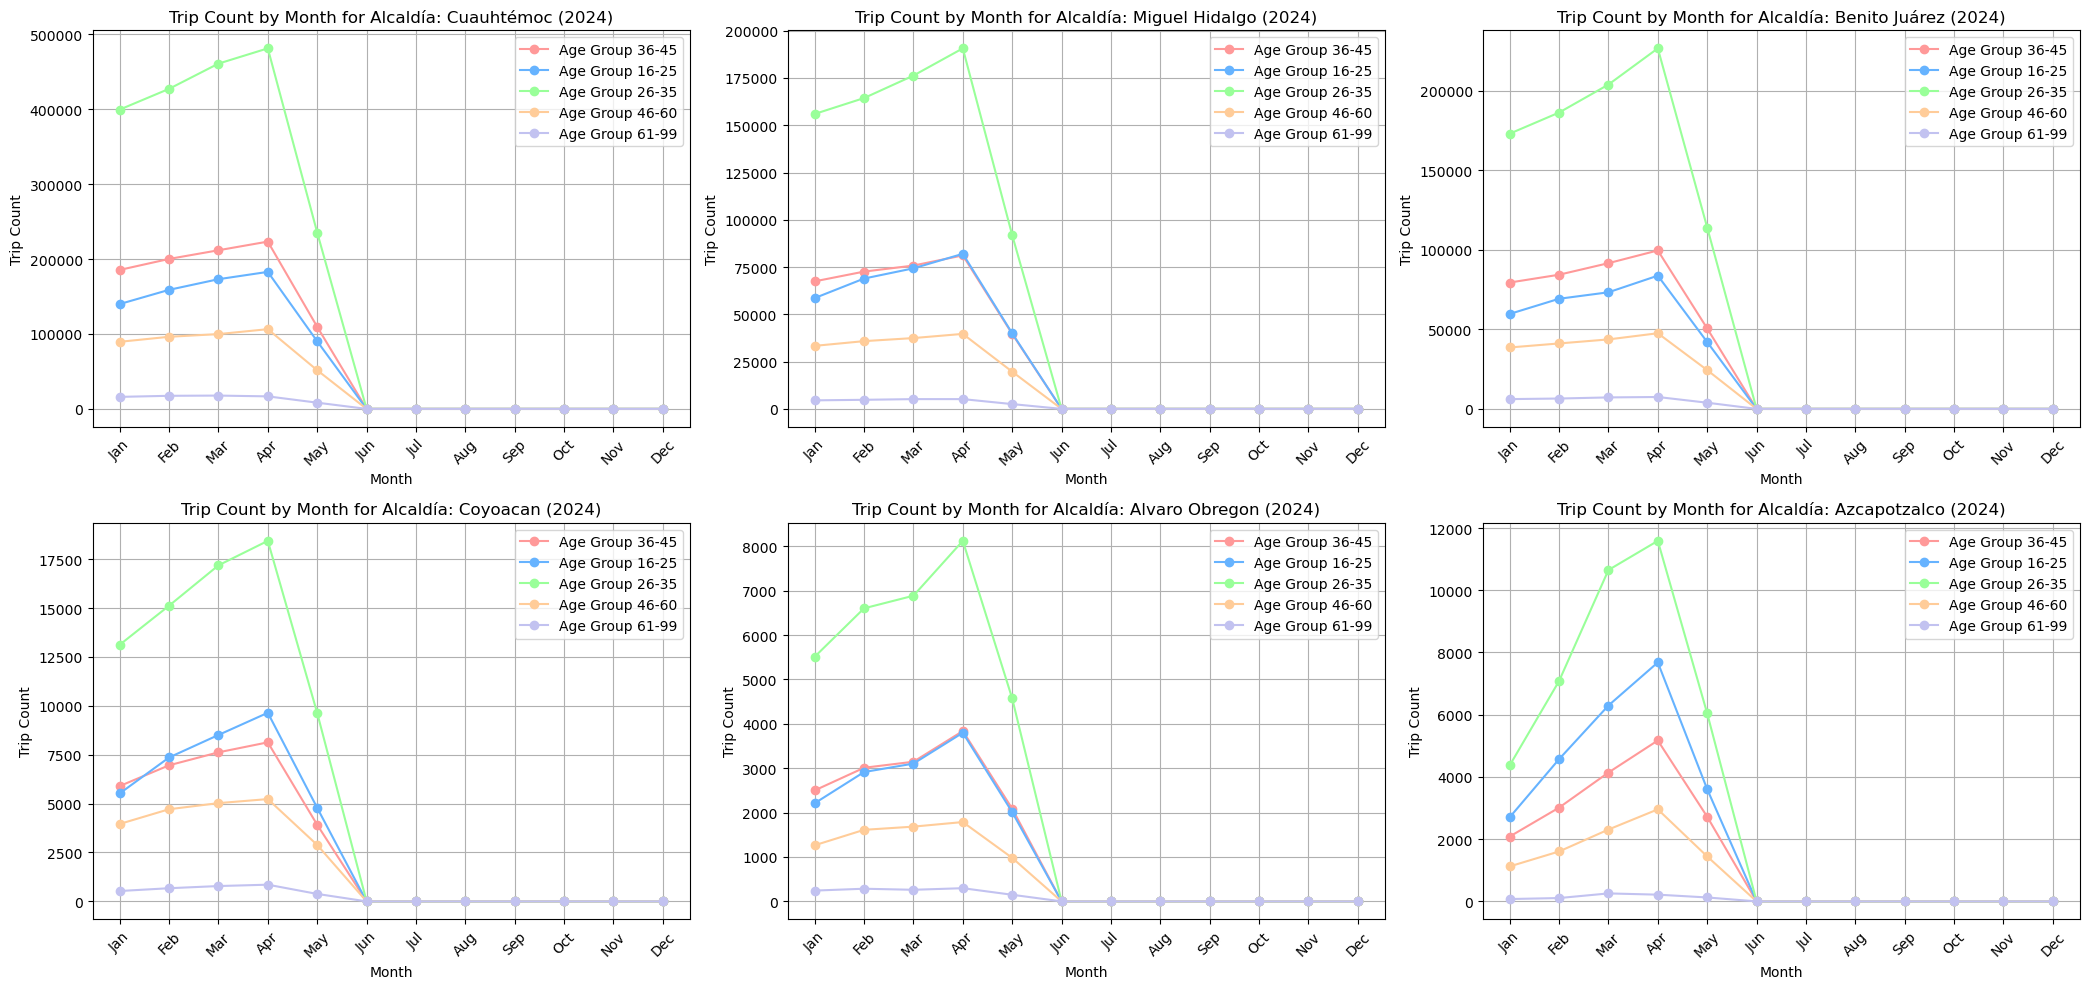

In [266]:
# Define the unique Alcaldias and Age Groups
alcaldias = data_2024['Alcaldia'].unique()
age_groups = data_2024['Age_Group'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 Alcaldias)
fig, axs = plt.subplots(2, 3, figsize=(21, 10))  # Updated layout

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Create a dictionary to map each age group to a specific color
color_dict = {age_group: colors[i] for i, age_group in enumerate(age_groups)}

# Iterate over each Alcaldia and create a separate plot
for i, alcaldia in enumerate(alcaldias):
    # Filter data for the current Alcaldia
    alcaldia_data_2024 = data_2024[data_2024['Alcaldia'] == alcaldia]

    # Group by month and age group to calculate the trip count
    trip_count_per_month_age = alcaldia_data_2024.groupby(['Month', 'Age_Group']).size().reset_index(name='Trip_Count')

    # Plot data for each Age Group
    for age_group in age_groups:
        group_data = trip_count_per_month_age[trip_count_per_month_age['Age_Group'] == age_group]
        axs[i].plot(group_data['Month'], group_data['Trip_Count'], label=f'Age Group {age_group}', marker='o', color=color_dict[age_group])

    # Add labels and legend
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Trip Count')
    axs[i].set_title(f'Trip Count by Month for Alcaldía: {alcaldia} (2024)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show month names
for ax in axs:
    ax.set_xticks(range(1, 13))  # Set the x-ticks to show months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names

# Adjust layout
plt.tight_layout()
plt.show()

### 2024 shows an increase of riders age range 16-25 for coyoacan, miguel hidalgo and Azcapotzalco

## Moving on to daily stats

In [ ]:
# Define the custom color palette for Age_Group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Group by 'Year', 'Week_Day', 'Alcaldia', and 'Age_Group' to calculate the average trip duration for each day of the week
avg_trip_duration_by_age_day_alcaldia = merged_2023_2024_stations.groupby(['Year', 'Week_Day', 'Alcaldia', 'Age_Group'])['Trip_Duration'].mean().reset_index(name='Avg Trip Duration')

# Create a line chart using Plotly Express with weekday on the x-axis and Alcaldia in columns
fig = px.line(avg_trip_duration_by_age_day_alcaldia, x='Week_Day', y='Avg Trip Duration', color='Age_Group', 
              facet_col='Alcaldia',  # Create separate columns for each Alcaldia
              facet_col_wrap=3,  # Wrap into multiple rows if there are many Alcaldias
              facet_row='Year',  # Create separate rows for each Year
              title='Average Daily Trip Duration by Age Group for Each Alcaldía (2023 vs 2024)',
              labels={'Week_Day': 'Week Day', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
              color_discrete_sequence=colors,  # Set custom colors for each age group
              markers=True)  # Add markers to the lines

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=800,  # Set the desired height to accommodate multiple subplots
    xaxis_title='Week Day',
    yaxis_title='Average Trip Duration (minutes)'
)

# Update x-axis ticks to show weekday names
fig.update_xaxes(tickmode='array', tickvals=[0, 1, 2, 3, 4, 5, 6],
                 ticktext=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Show the plot
fig.show()

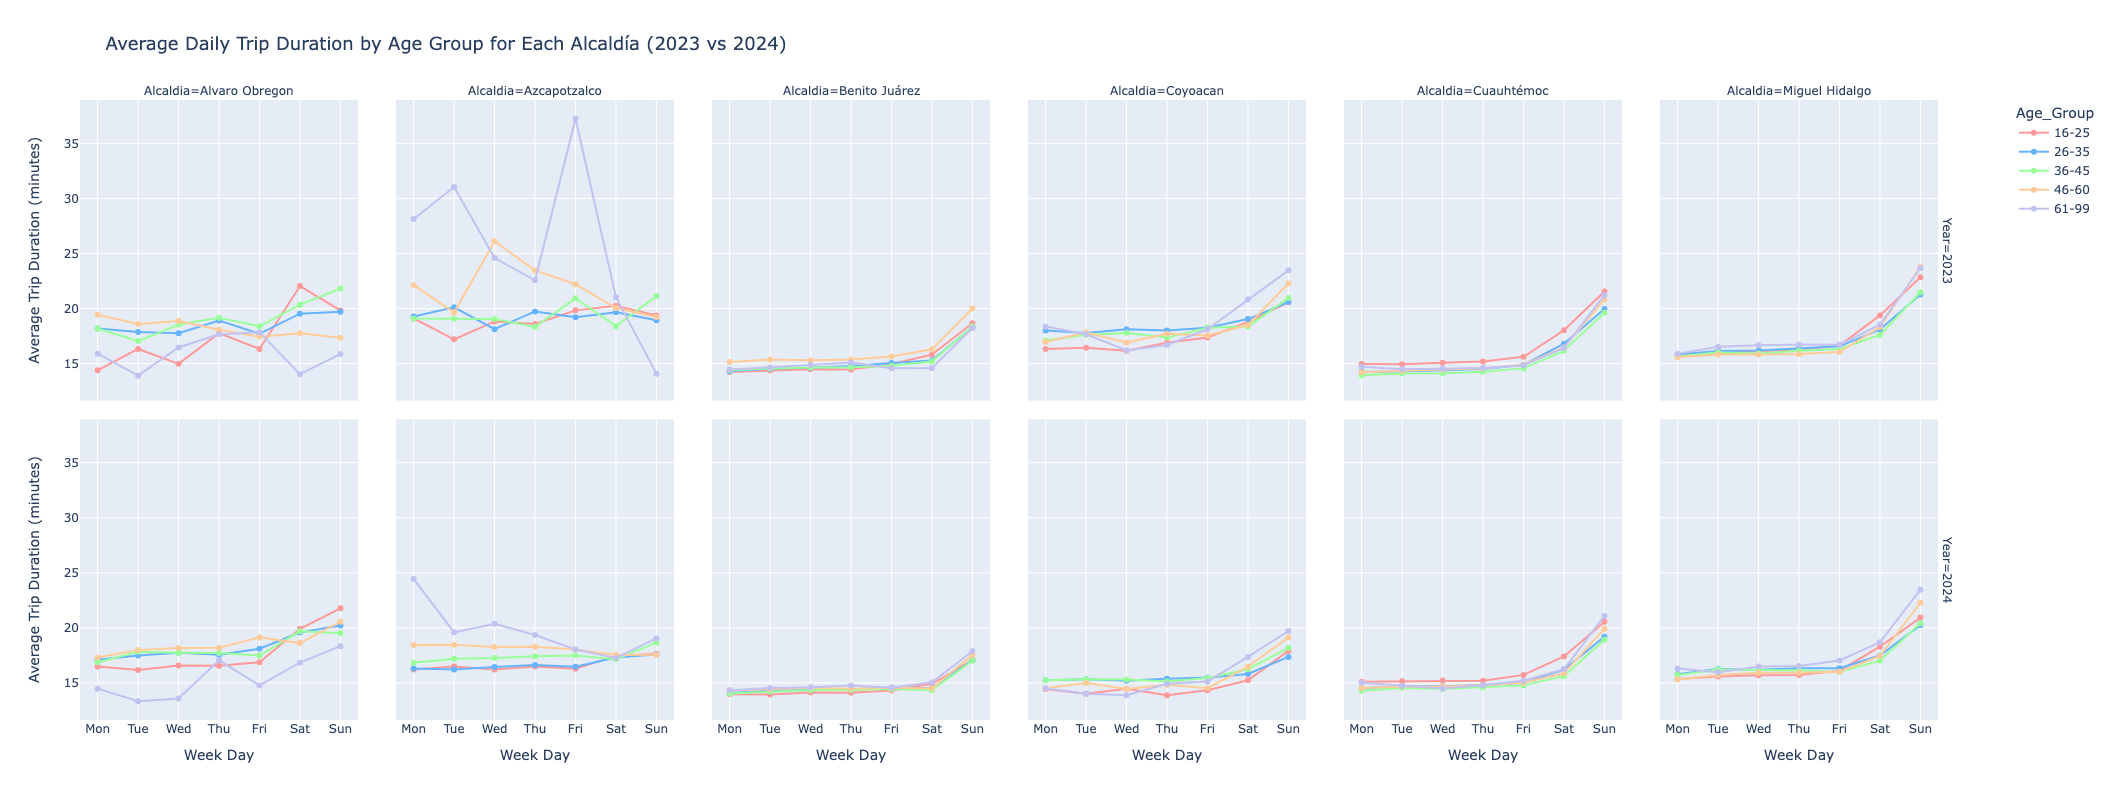

### Daily activity shows that all age groups follow similar behavior except for 61-99 age group
### From past findings, trip duration increases at the start of the weekend
### Azcapotzalco shows higher durations during start and middle of the week than the weekend for 61-99 age range
### 46-60 also showed higher durations early in the week rather than the weekend for azcapotzalco

In [ ]:
# Group by 'Year', 'Week_Day', 'Alcaldia', and 'Age_Group' to calculate the trip count for each day of the week
trip_count_by_age_day_alcaldia = merged_2023_2024_stations.groupby(['Year', 'Week_Day', 'Alcaldia', 'Age_Group']).size().reset_index(name='Trip Count')

# Create a line chart using Plotly Express with weekday on the x-axis and Alcaldia in columns
fig = px.line(trip_count_by_age_day_alcaldia, x='Week_Day', y='Trip Count', color='Age_Group', 
              facet_col='Alcaldia',  # Create separate columns for each Alcaldia
              facet_col_wrap=3,  # Wrap into multiple rows if there are many Alcaldias
              facet_row='Year',  # Create separate rows for each Year
              title='Daily Trip Count by Age Group for Each Alcaldía (2023 vs 2024)',
              labels={'Week_Day': 'Week Day', 'Trip Count': 'Trip Count'},
              color_discrete_sequence=colors,  # Set custom colors for each age group
              markers=True)  # Add markers to the lines

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=800,  # Set the desired height to accommodate multiple subplots
    xaxis_title='Week Day',
    yaxis_title='Trip Count'
)

# Update x-axis ticks to show weekday names
fig.update_xaxes(tickmode='array', tickvals=[0, 1, 2, 3, 4, 5, 6],
                 ticktext=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Show the plot
fig.show()


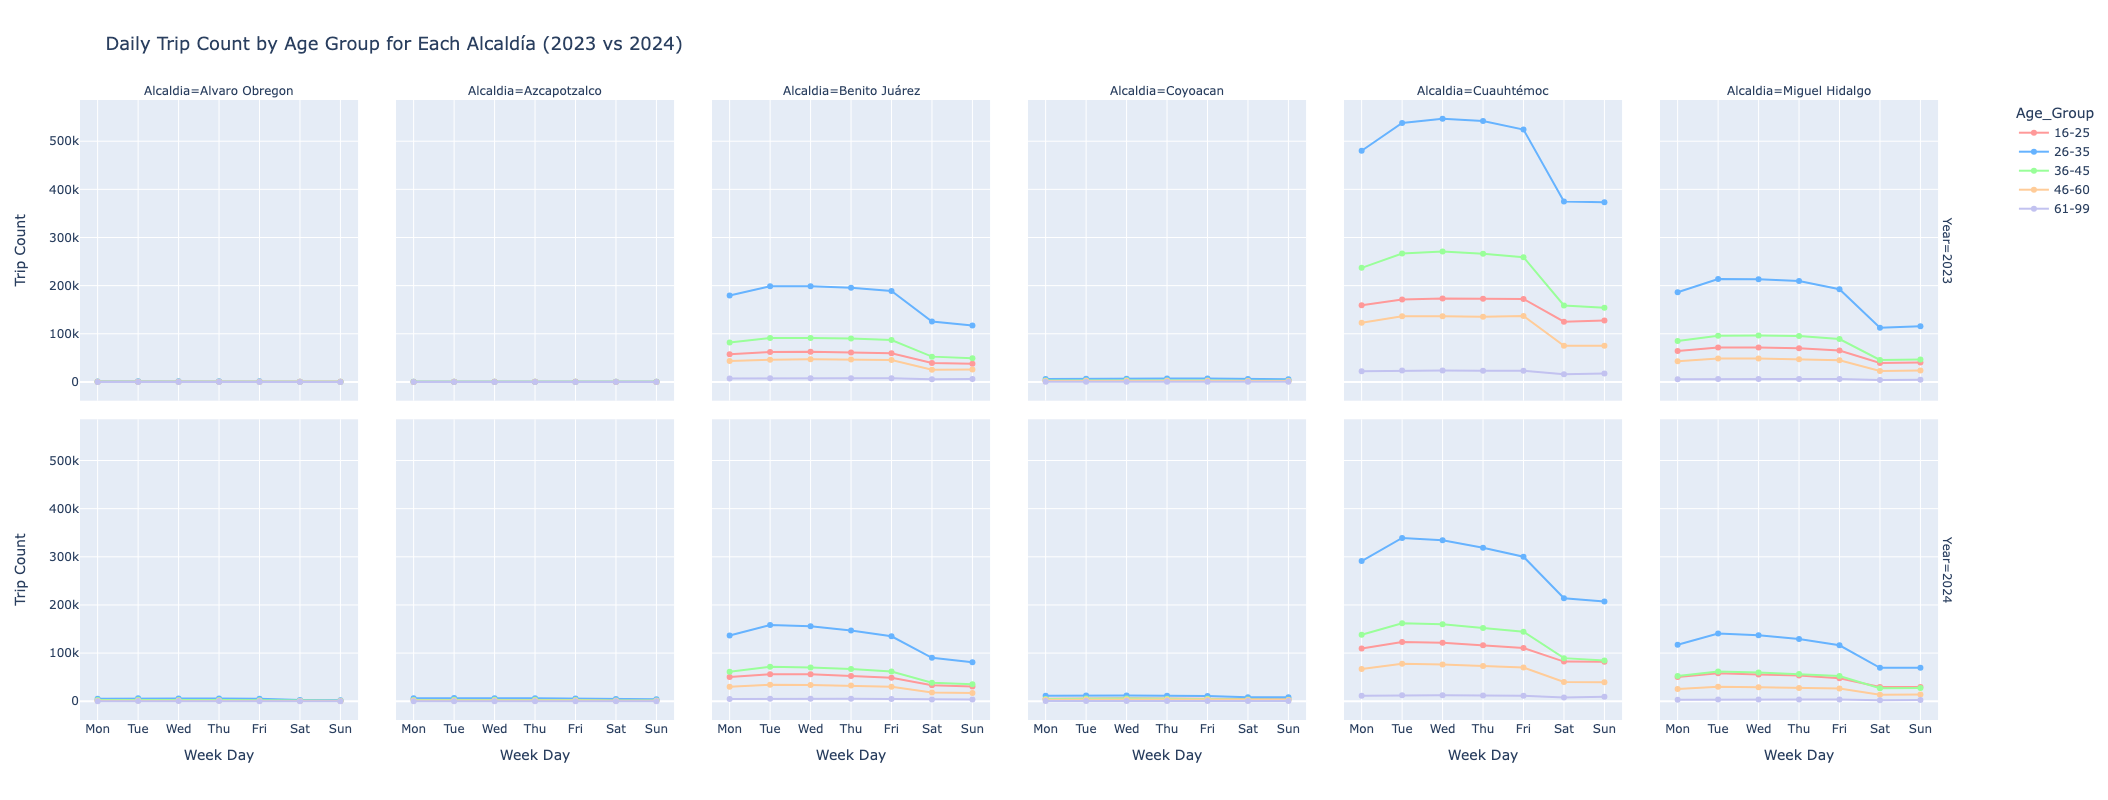

### 2024 shows an increase in trips by 16-26 in miguel hidalgo reaching very close with 36-45 age group 
### Coyoacan also shows that 16-25 age group surpases 36-45 age group in daily trips taken (2024)
### Cuauhtemoc maintains the lead with most trips taken with age group 26-35 leading

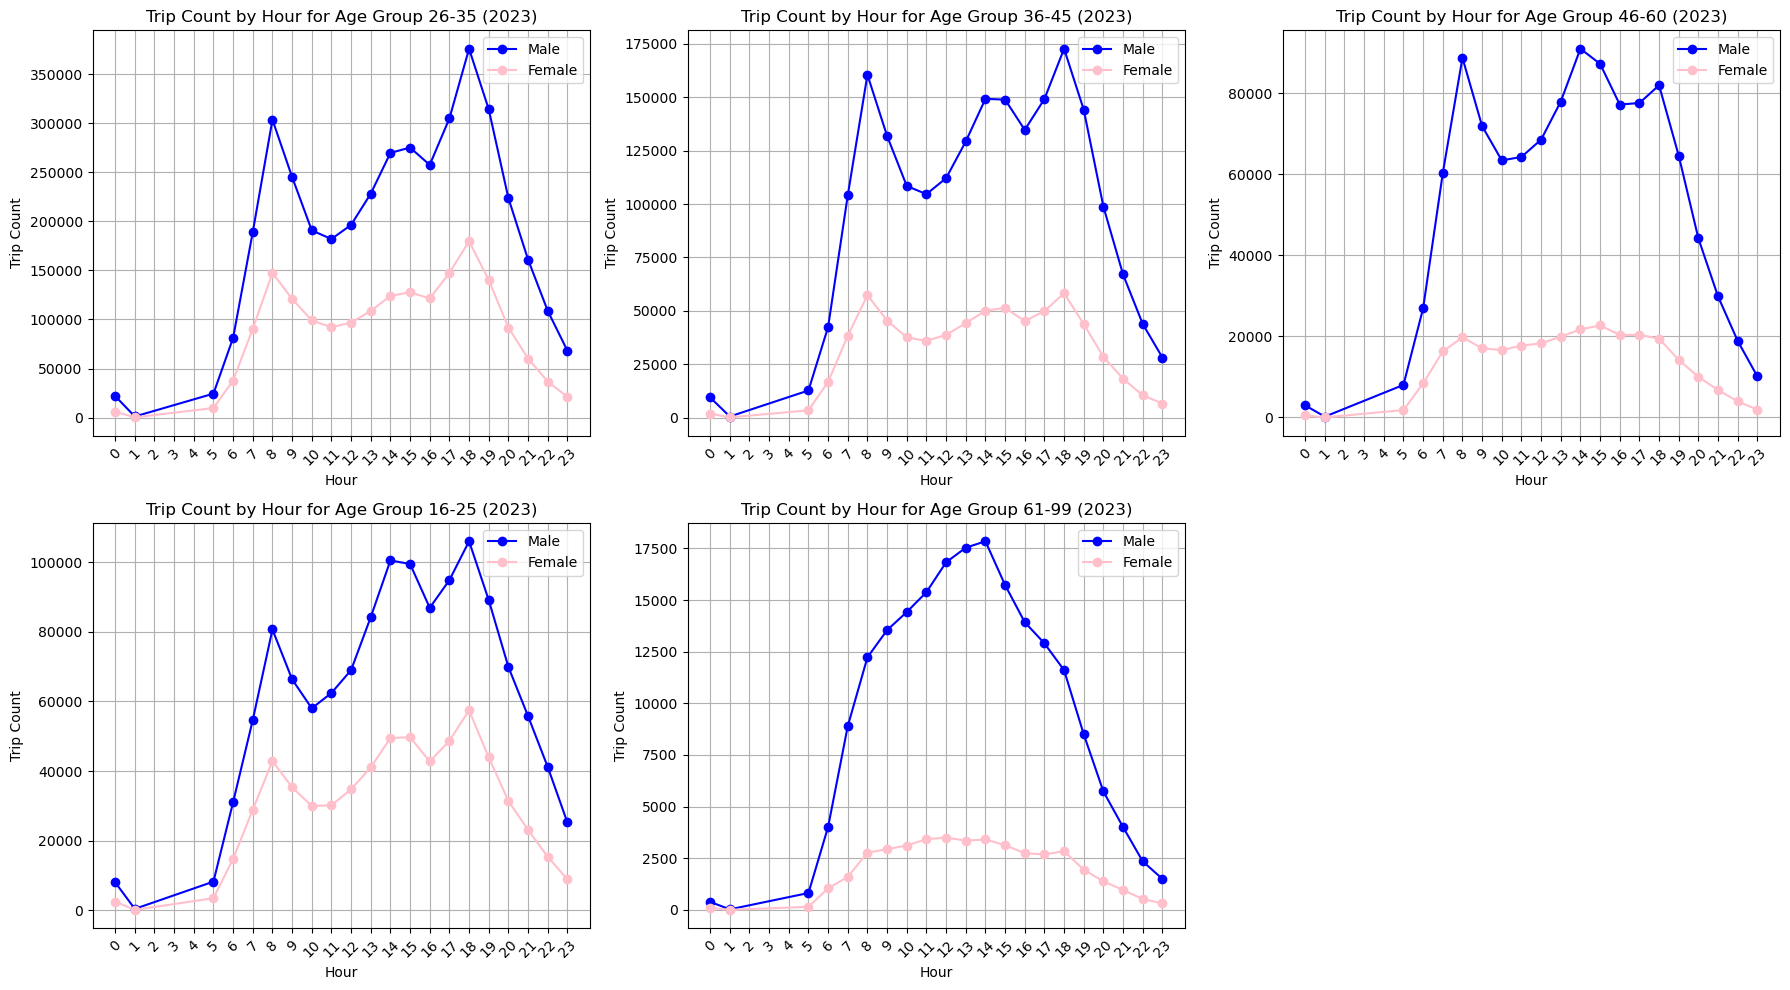

In [273]:
# Define the unique age groups
age_groups = data_2023['Age_Group'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 age groups)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each age group and create a separate plot
for i, age_group in enumerate(age_groups):
    # Filter data for the current age group
    age_data_2023 = data_2023[data_2023['Age_Group'] == age_group]

    # Group by hour and gender to calculate the trip count
    trip_count_per_hour_gender = age_data_2023.groupby(['Hour', 'Gender']).size().reset_index(name='Trip_Count')

    # Plot data for Male
    male_data = trip_count_per_hour_gender[trip_count_per_hour_gender['Gender'] == 'M']
    axs[i].plot(male_data['Hour'], male_data['Trip_Count'], label='Male', marker='o', color='blue')

    # Plot data for Female
    female_data = trip_count_per_hour_gender[trip_count_per_hour_gender['Gender'] == 'F']
    axs[i].plot(female_data['Hour'], female_data['Trip_Count'], label='Female', marker='o', color='pink')

    # Add labels and legend
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Trip Count')
    axs[i].set_title(f'Trip Count by Hour for Age Group {age_group} (2023)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

     # Set x-ticks to show all hours
    axs[i].set_xticks(range(24))  # Set the x-ticks to show all hours
    axs[i].set_xticklabels(range(24))  # Show hour numbers as labels


# Remove the last empty subplot
fig.delaxes(axs[-1])


# Adjust layout
plt.tight_layout()
plt.show()

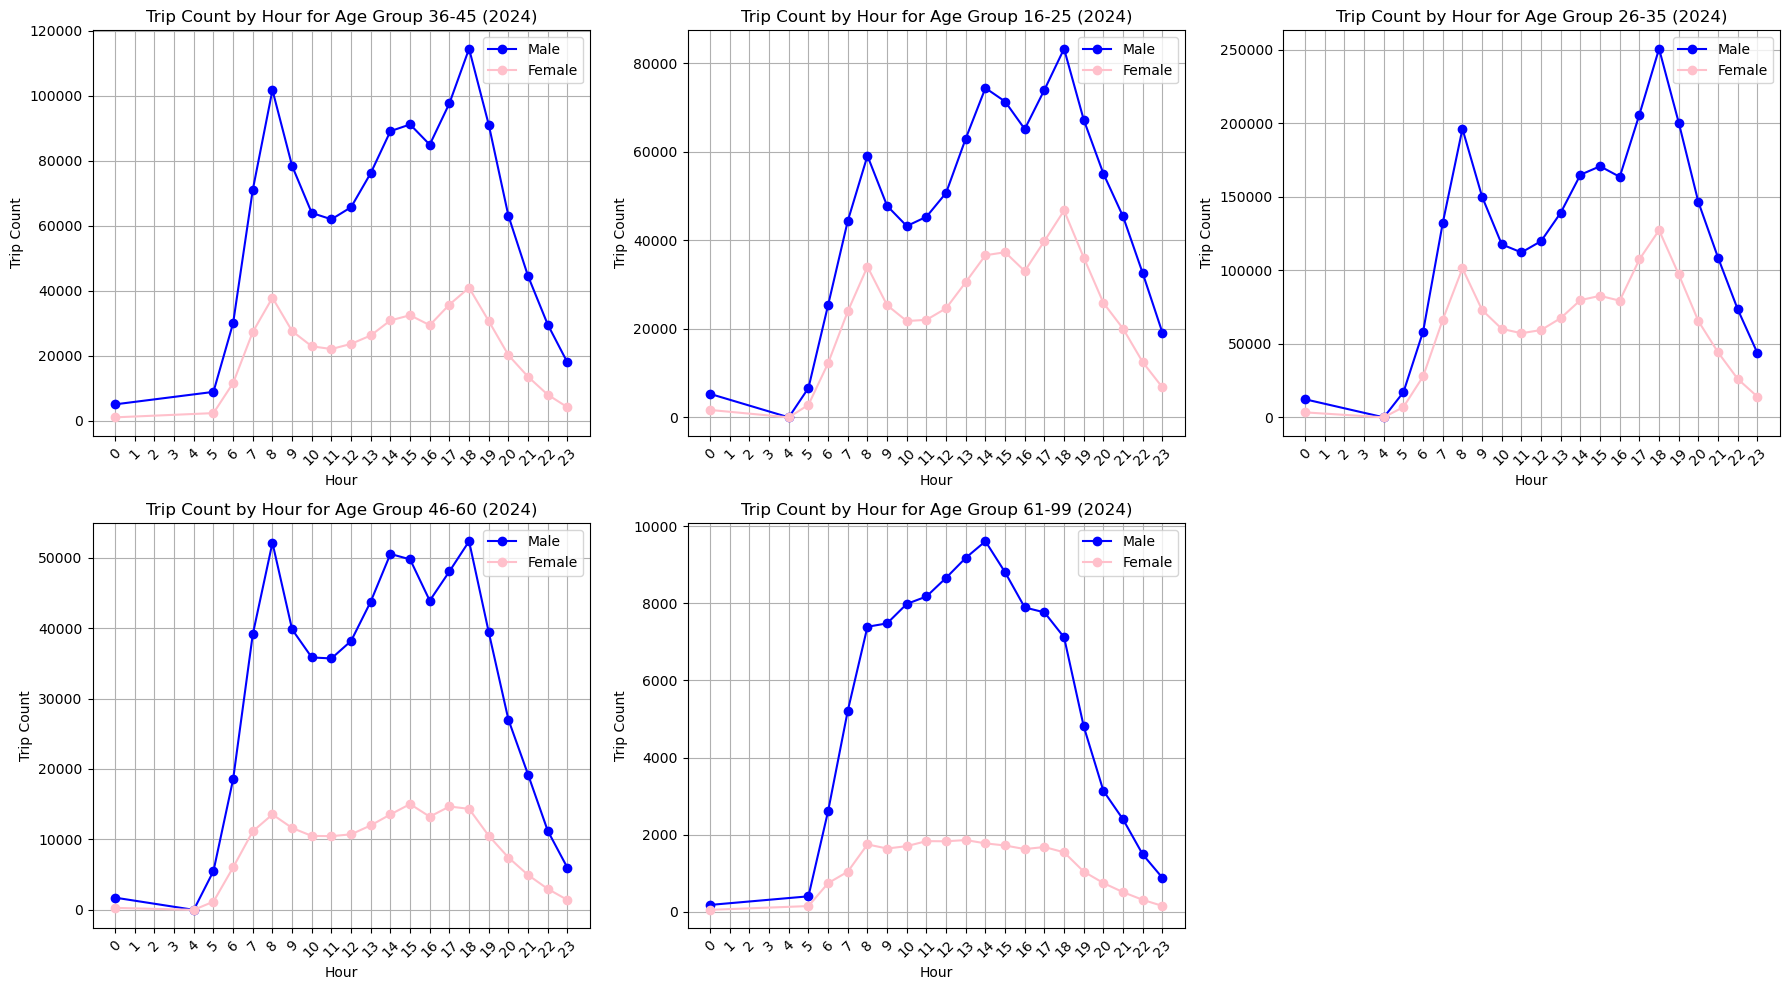

In [274]:
# Define the unique age groups
age_groups = data_2024['Age_Group'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 age groups)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each age group and create a separate plot
for i, age_group in enumerate(age_groups):
    # Filter data for the current age group
    age_data_2024 = data_2024[data_2024['Age_Group'] == age_group]

    # Group by hour and gender to calculate the trip count
    trip_count_per_hour_gender = age_data_2024.groupby(['Hour', 'Gender']).size().reset_index(name='Trip_Count')

    # Plot data for Male
    male_data = trip_count_per_hour_gender[trip_count_per_hour_gender['Gender'] == 'M']
    axs[i].plot(male_data['Hour'], male_data['Trip_Count'], label='Male', marker='o', color='blue')

    # Plot data for Female
    female_data = trip_count_per_hour_gender[trip_count_per_hour_gender['Gender'] == 'F']
    axs[i].plot(female_data['Hour'], female_data['Trip_Count'], label='Female', marker='o', color='pink')

    # Add labels and legend
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Trip Count')
    axs[i].set_title(f'Trip Count by Hour for Age Group {age_group} (2024)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

     # Set x-ticks to show all hours
    axs[i].set_xticks(range(24))  # Set the x-ticks to show all hours
    axs[i].set_xticklabels(range(24))  # Show hour numbers as labels


# Remove the last empty subplot
fig.delaxes(axs[-1])


# Adjust layout
plt.tight_layout()
plt.show()

### Both years show that age group 16-25 increase trip count by each peak with 18:00 recording the highest count for that age group (males)
### All other age gruops show that the highest trup count are recorded at 18:00 (males)
### While age group 61-99 does not follow morning or evening rush hour activity, instead it dispays peak activity at at 14:00 for (males)
### Females 46 and up do not show such drastic hourly changes, instead they display gradual activty throughout the day starting at 8am with the first peak

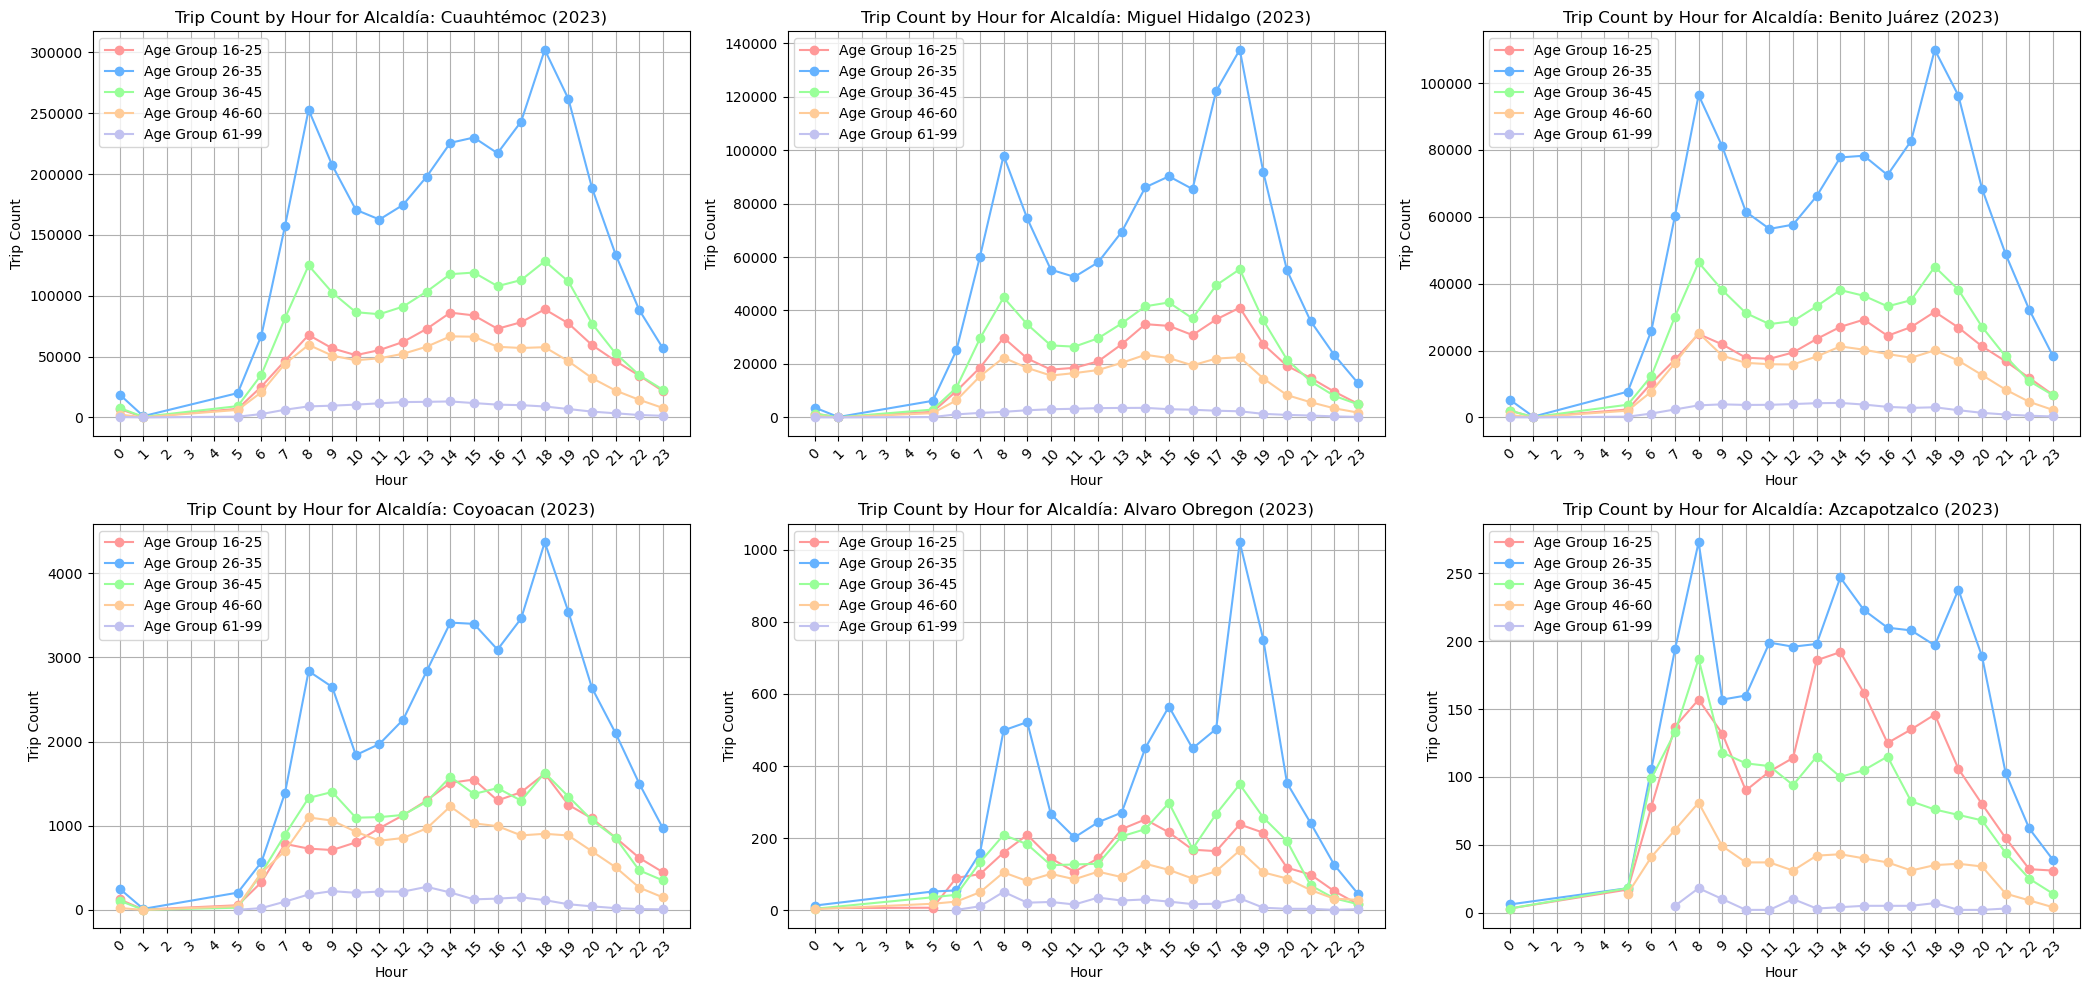

In [276]:
# Define the custom color palette for Age_Group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Define the unique Age Groups across both years to ensure consistency
age_groups = sorted(set(data_2023['Age_Group'].unique()).union(set(data_2024['Age_Group'].unique())))

# Create a dictionary to map each age group to a specific color
color_dict = {age_group: colors[i % len(colors)] for i, age_group in enumerate(age_groups)}

# Define the unique Alcaldias for 2023
alcaldias_2023 = data_2023['Alcaldia'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 Alcaldias)
fig, axs = plt.subplots(2, 3, figsize=(21, 10))  # Updated layout

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each Alcaldia and create a separate plot
for i, alcaldia in enumerate(alcaldias_2023):
    # Filter data for the current Alcaldia
    alcaldia_data_2023 = data_2023[data_2023['Alcaldia'] == alcaldia]

    # Group by hour and age group to calculate the trip count
    trip_count_per_hour_age = alcaldia_data_2023.groupby(['Hour', 'Age_Group']).size().reset_index(name='Trip_Count')

    # Plot data for each Age Group
    for age_group in age_groups:
        group_data = trip_count_per_hour_age[trip_count_per_hour_age['Age_Group'] == age_group]
        axs[i].plot(group_data['Hour'], group_data['Trip_Count'], label=f'Age Group {age_group}', marker='o', color=color_dict[age_group])

    # Add labels and legend
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Trip Count')
    axs[i].set_title(f'Trip Count by Hour for Alcaldía: {alcaldia} (2023)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show all hours
for ax in axs:
    ax.set_xticks(range(24))  # Set the x-ticks to show all hours
    ax.set_xticklabels(range(24))  # Hour numbers as labels

# Adjust layout
plt.tight_layout()
plt.show()

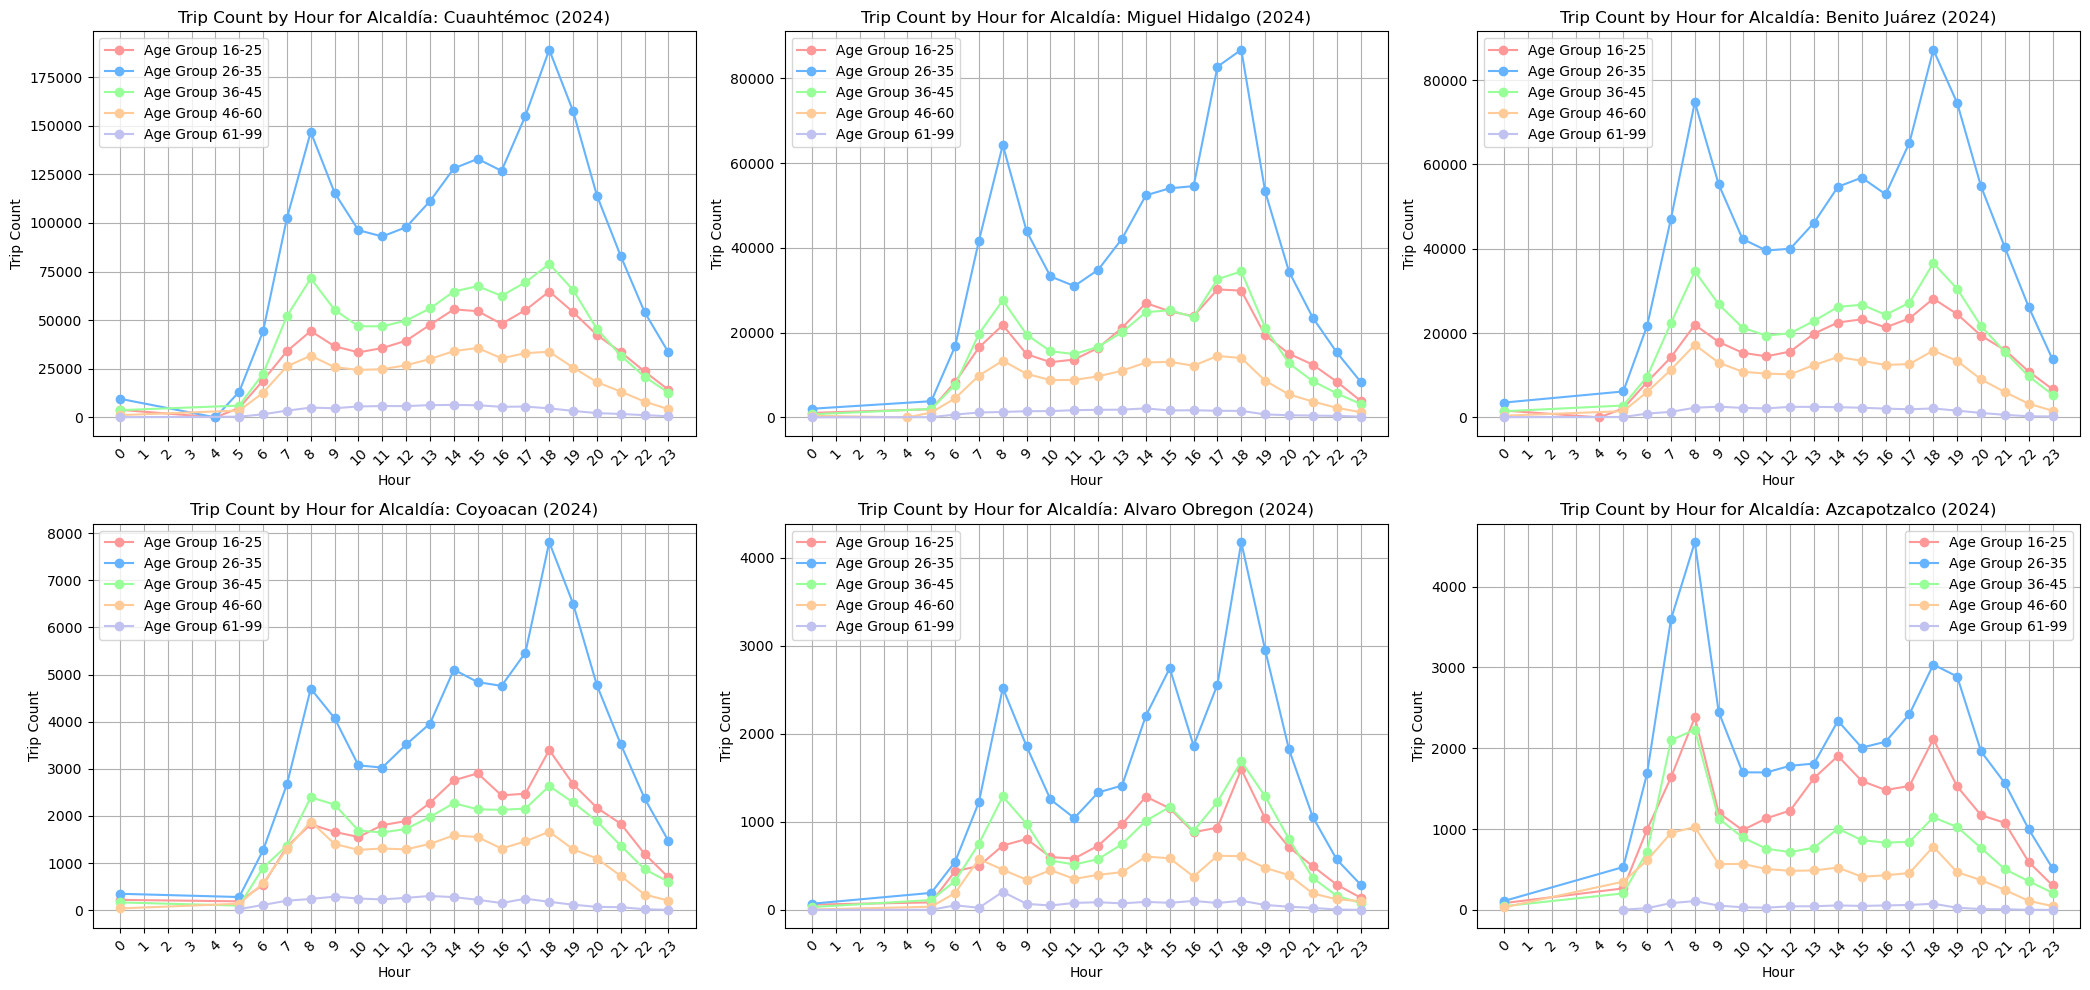

In [277]:
# Define the unique Alcaldias for 2024
alcaldias_2024 = data_2024['Alcaldia'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 Alcaldias)
fig, axs = plt.subplots(2, 3, figsize=(21, 10))  # Updated layout

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each Alcaldia and create a separate plot
for i, alcaldia in enumerate(alcaldias_2024):
    # Filter data for the current Alcaldia
    alcaldia_data_2024 = data_2024[data_2024['Alcaldia'] == alcaldia]

    # Group by hour and age group to calculate the trip count
    trip_count_per_hour_age = alcaldia_data_2024.groupby(['Hour', 'Age_Group']).size().reset_index(name='Trip_Count')

    # Plot data for each Age Group
    for age_group in age_groups:
        group_data = trip_count_per_hour_age[trip_count_per_hour_age['Age_Group'] == age_group]
        axs[i].plot(group_data['Hour'], group_data['Trip_Count'], label=f'Age Group {age_group}', marker='o', color=color_dict[age_group])

    # Add labels and legend
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Trip Count')
    axs[i].set_title(f'Trip Count by Hour for Alcaldía: {alcaldia} (2024)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show all hours
for ax in axs:
    ax.set_xticks(range(24))  # Set the x-ticks to show all hours
    ax.set_xticklabels(range(24))  # Hour numbers as labels

# Adjust layout
plt.tight_layout()
plt.show()

### Azcapotzalco shows different behavior from all other alcaldias 
### For both 2023 and 2024, azcapotzalco show that the busiest hour is 8am for almost all age groups 
### All other alcaldias show 3 peaks (morning, mid-day and evening rush hours for almost all age groups
### 2024 shows an increase in hourly trips of age group 16-25 surpasing 26-35 age group some alcaldias 
### These hourly fluctuations and difference between ages and alcaldias may be for a number of reasons including diferent types of areas such as residenctial, commercial, education and more
### Alcaldias where trip count is very high for the evening hours may reflect a high concentration of jobs while high counts during the morning hours may indicate higher residents that commute to work

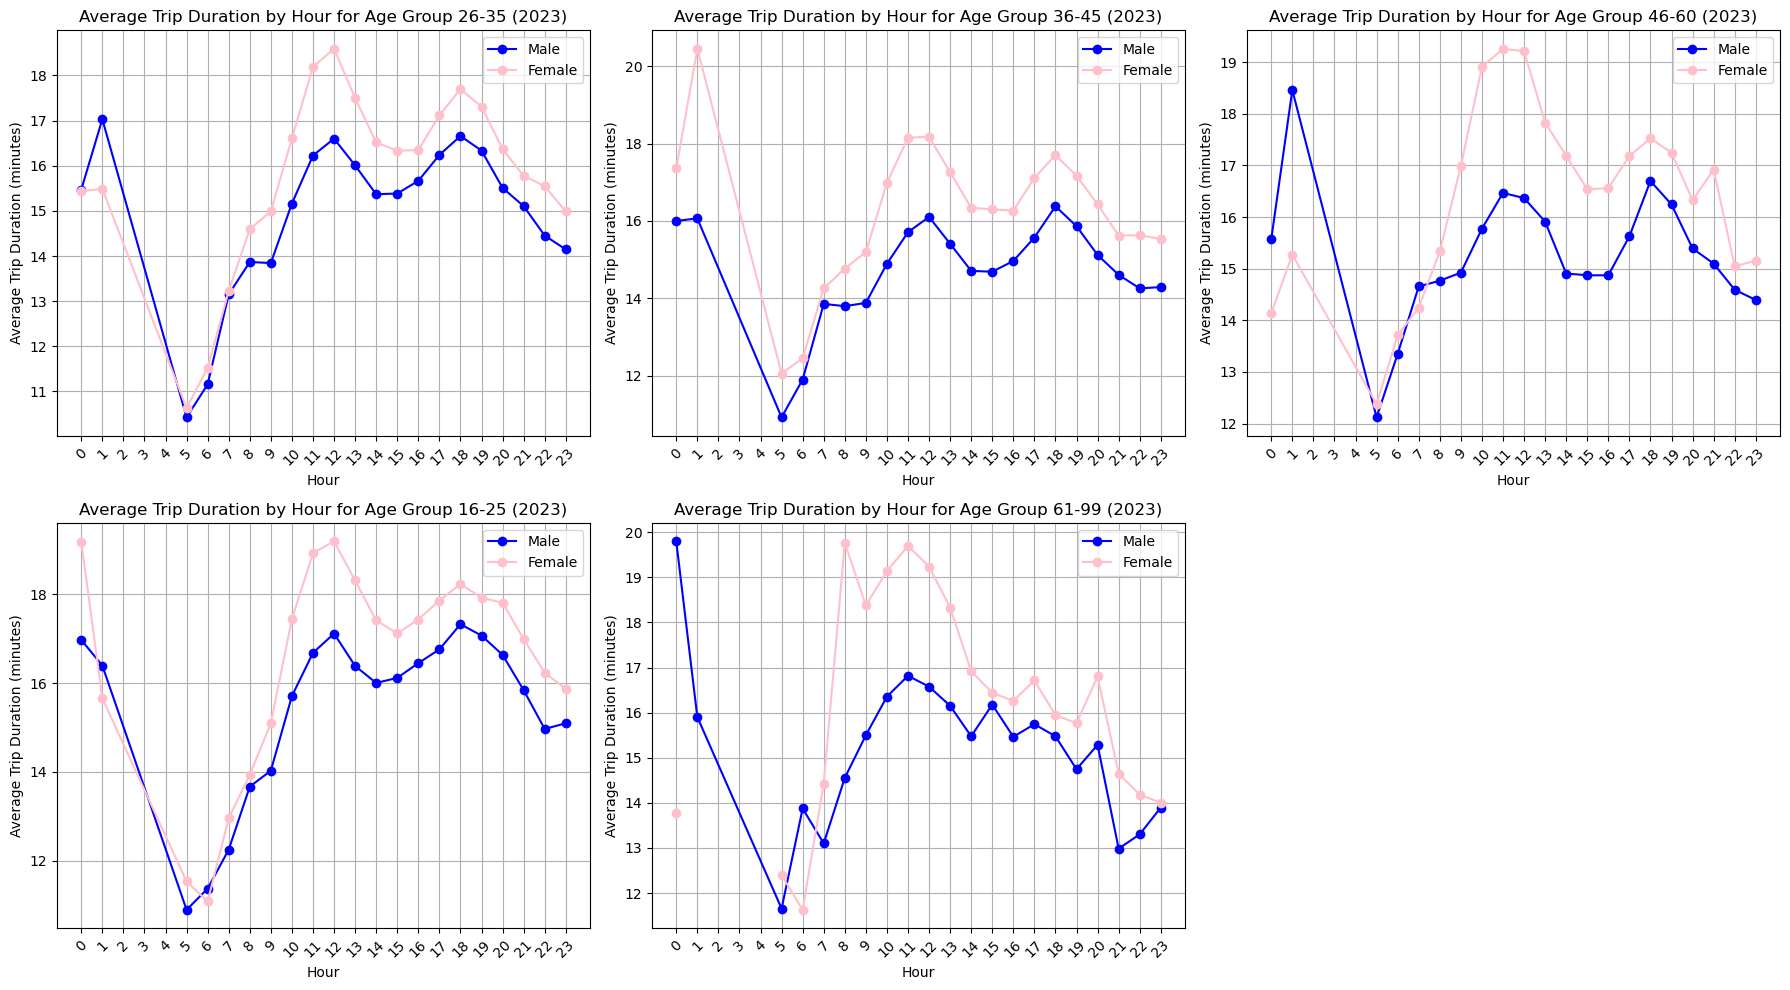

In [279]:
# Define the unique age groups
age_groups = data_2023['Age_Group'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 age groups)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each age group and create a separate plot
for i, age_group in enumerate(age_groups):
    # Filter data for the current age group
    age_data_2023 = data_2023[data_2023['Age_Group'] == age_group]

    # Group by hour and gender to calculate the average trip duration
    avg_trip_duration_per_hour_gender = age_data_2023.groupby(['Hour', 'Gender'])['Trip_Duration'].mean().reset_index(name='Avg_Trip_Duration')

    # Plot data for Male
    male_data = avg_trip_duration_per_hour_gender[avg_trip_duration_per_hour_gender['Gender'] == 'M']
    axs[i].plot(male_data['Hour'], male_data['Avg_Trip_Duration'], label='Male', marker='o', color='blue')

    # Plot data for Female
    female_data = avg_trip_duration_per_hour_gender[avg_trip_duration_per_hour_gender['Gender'] == 'F']
    axs[i].plot(female_data['Hour'], female_data['Avg_Trip_Duration'], label='Female', marker='o', color='pink')

    # Add labels and legend
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Average Trip Duration (minutes)')
    axs[i].set_title(f'Average Trip Duration by Hour for Age Group {age_group} (2023)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

    # Set x-ticks to show all hours
    axs[i].set_xticks(range(24))  # Set the x-ticks to show all hours
    axs[i].set_xticklabels(range(24))  # Show hour numbers as labels

# Remove the last empty subplot
fig.delaxes(axs[-1])

# Adjust layout
plt.tight_layout()
plt.show()

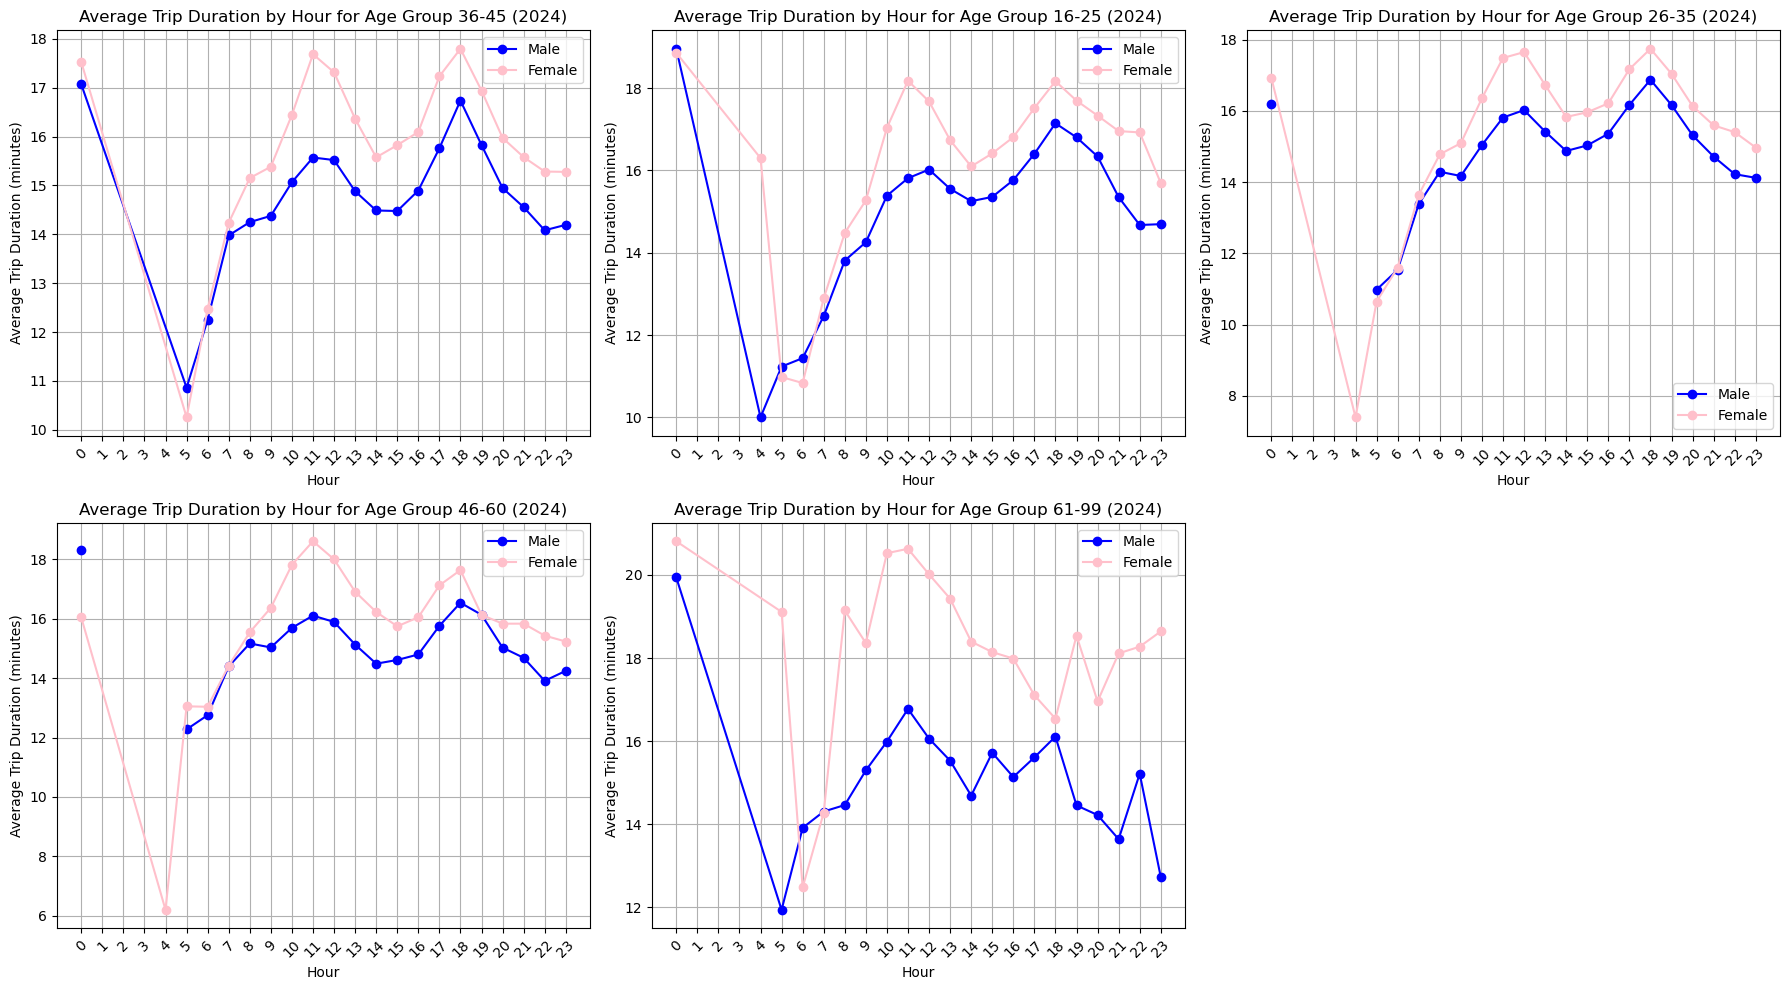

In [280]:
# Define the unique age groups
age_groups = data_2024['Age_Group'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 age groups)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each age group and create a separate plot
for i, age_group in enumerate(age_groups):
    # Filter data for the current age group
    age_data_2024 = data_2024[data_2024['Age_Group'] == age_group]

    # Group by hour and gender to calculate the average trip duration
    avg_trip_duration_per_hour_gender = age_data_2024.groupby(['Hour', 'Gender'])['Trip_Duration'].mean().reset_index(name='Avg_Trip_Duration')
    # Plot data for Male
    male_data = avg_trip_duration_per_hour_gender[avg_trip_duration_per_hour_gender['Gender'] == 'M']
    axs[i].plot(male_data['Hour'], male_data['Avg_Trip_Duration'], label='Male', marker='o', color='blue')

    # Plot data for Female
    female_data = avg_trip_duration_per_hour_gender[avg_trip_duration_per_hour_gender['Gender'] == 'F']
    axs[i].plot(female_data['Hour'], female_data['Avg_Trip_Duration'], label='Female', marker='o', color='pink')

    # Add labels and legend
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Average Trip Duration (minutes)')
    axs[i].set_title(f'Average Trip Duration by Hour for Age Group {age_group} (2024)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

    # Set x-ticks to show all hours
    axs[i].set_xticks(range(24))  # Set the x-ticks to show all hours
    axs[i].set_xticklabels(range(24))  # Show hour numbers as labels

# Remove the last empty subplot
fig.delaxes(axs[-1])

# Adjust layout
plt.tight_layout()
plt.show()

### Monthly and daily data showed that females always surpased males in avg trip duration
### Hourly data shows that some hours are very close between both genders for different ages particularly in the early hours 
### Age 61-99 group shows the biggest spread differential for trip duration for various hours of the day

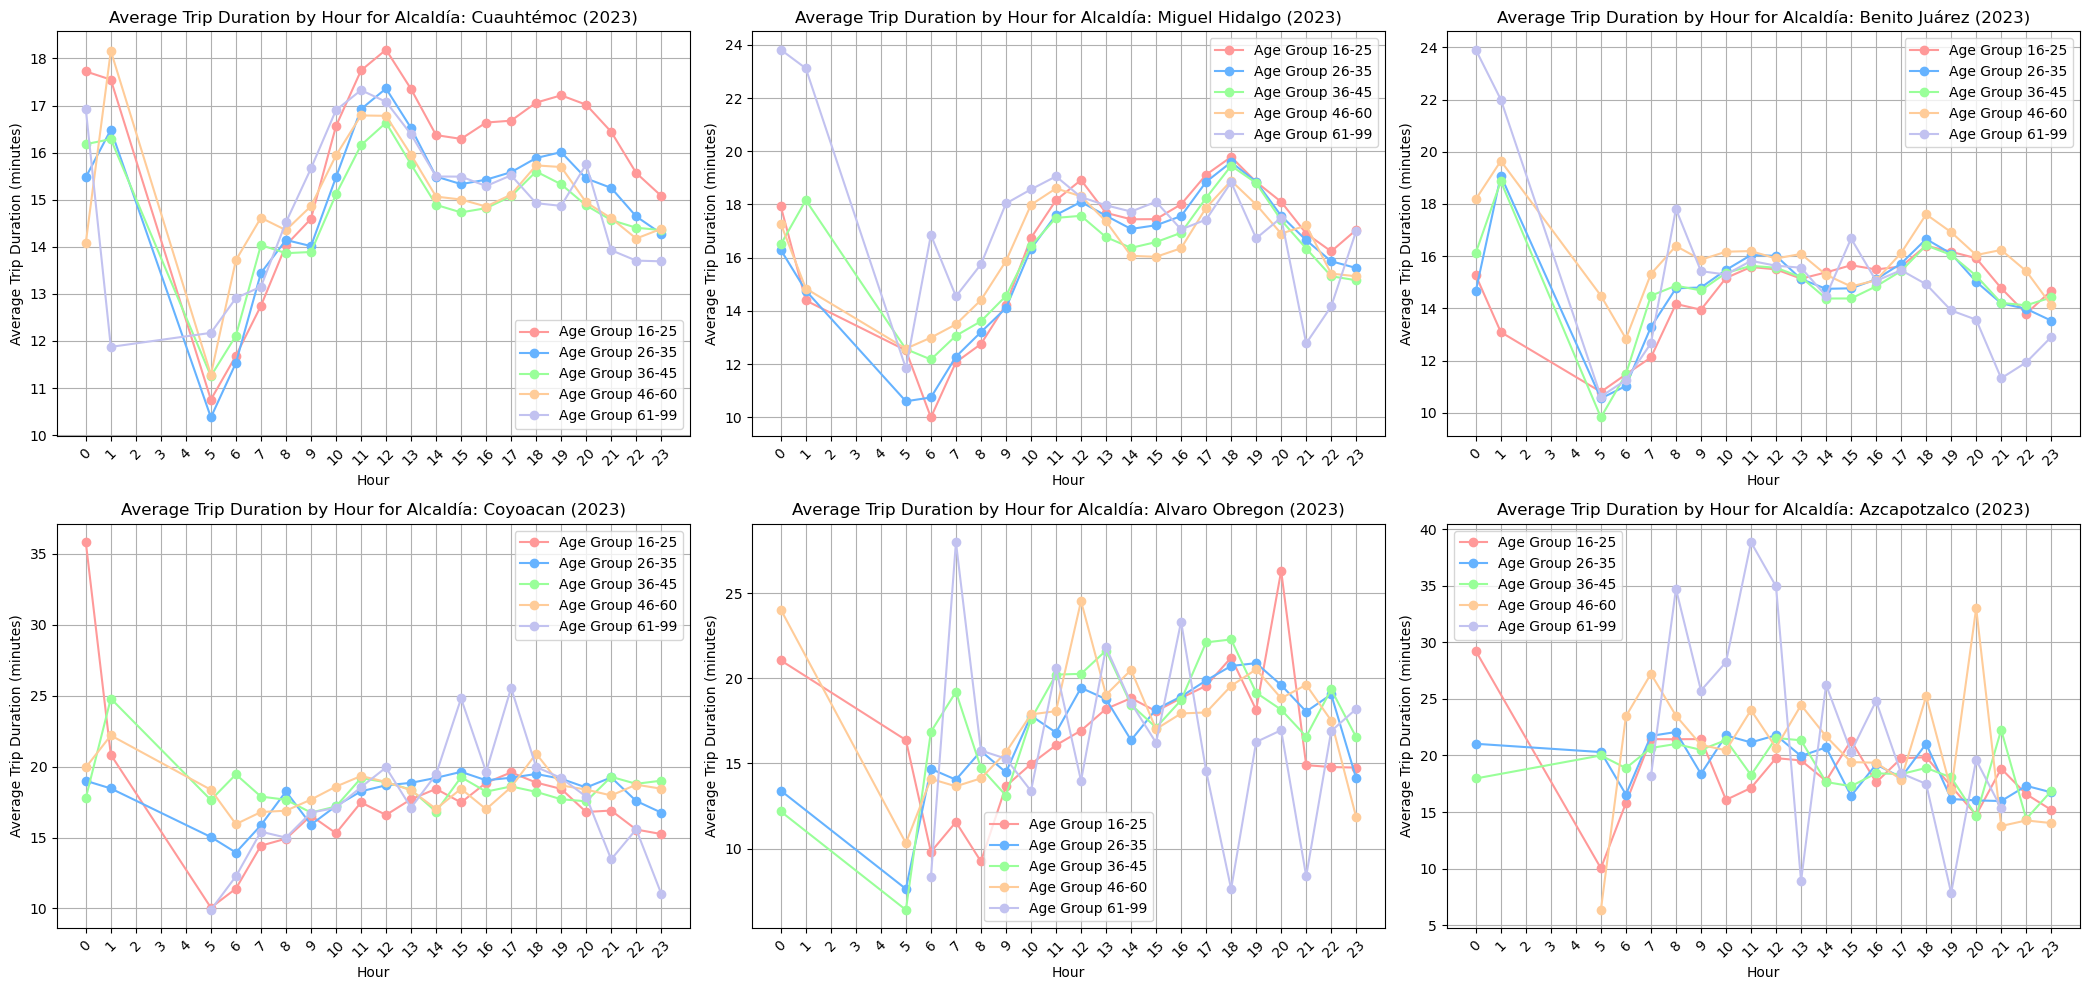

In [282]:
# Define the custom color palette for Age_Group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Define the unique Age Groups across both years to ensure consistency
age_groups = sorted(set(data_2023['Age_Group'].unique()).union(set(data_2024['Age_Group'].unique())))

# Create a dictionary to map each age group to a specific color
color_dict = {age_group: colors[i % len(colors)] for i, age_group in enumerate(age_groups)}

# Define the unique Alcaldias for 2023
alcaldias_2023 = data_2023['Alcaldia'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 Alcaldias)
fig, axs = plt.subplots(2, 3, figsize=(21, 10))  # Updated layout

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each Alcaldia and create a separate plot
for i, alcaldia in enumerate(alcaldias_2023):
    # Filter data for the current Alcaldia
    alcaldia_data_2023 = data_2023[data_2023['Alcaldia'] == alcaldia]

    # Group by hour and age group to calculate the average trip duration
    avg_trip_duration_per_hour_age = alcaldia_data_2023.groupby(['Hour', 'Age_Group'])['Trip_Duration'].mean().reset_index(name='Avg_Trip_Duration')

    # Plot data for each Age Group
    for age_group in age_groups:
        group_data = avg_trip_duration_per_hour_age[avg_trip_duration_per_hour_age['Age_Group'] == age_group]
        axs[i].plot(group_data['Hour'], group_data['Avg_Trip_Duration'], label=f'Age Group {age_group}', marker='o', color=color_dict[age_group])

    # Add labels and legend
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Average Trip Duration (minutes)')
    axs[i].set_title(f'Average Trip Duration by Hour for Alcaldía: {alcaldia} (2023)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show all hours
for ax in axs:
    ax.set_xticks(range(24))  # Set the x-ticks to show all hours
    ax.set_xticklabels(range(24))  # Hour numbers as labels

# Adjust layout
plt.tight_layout()
plt.show()

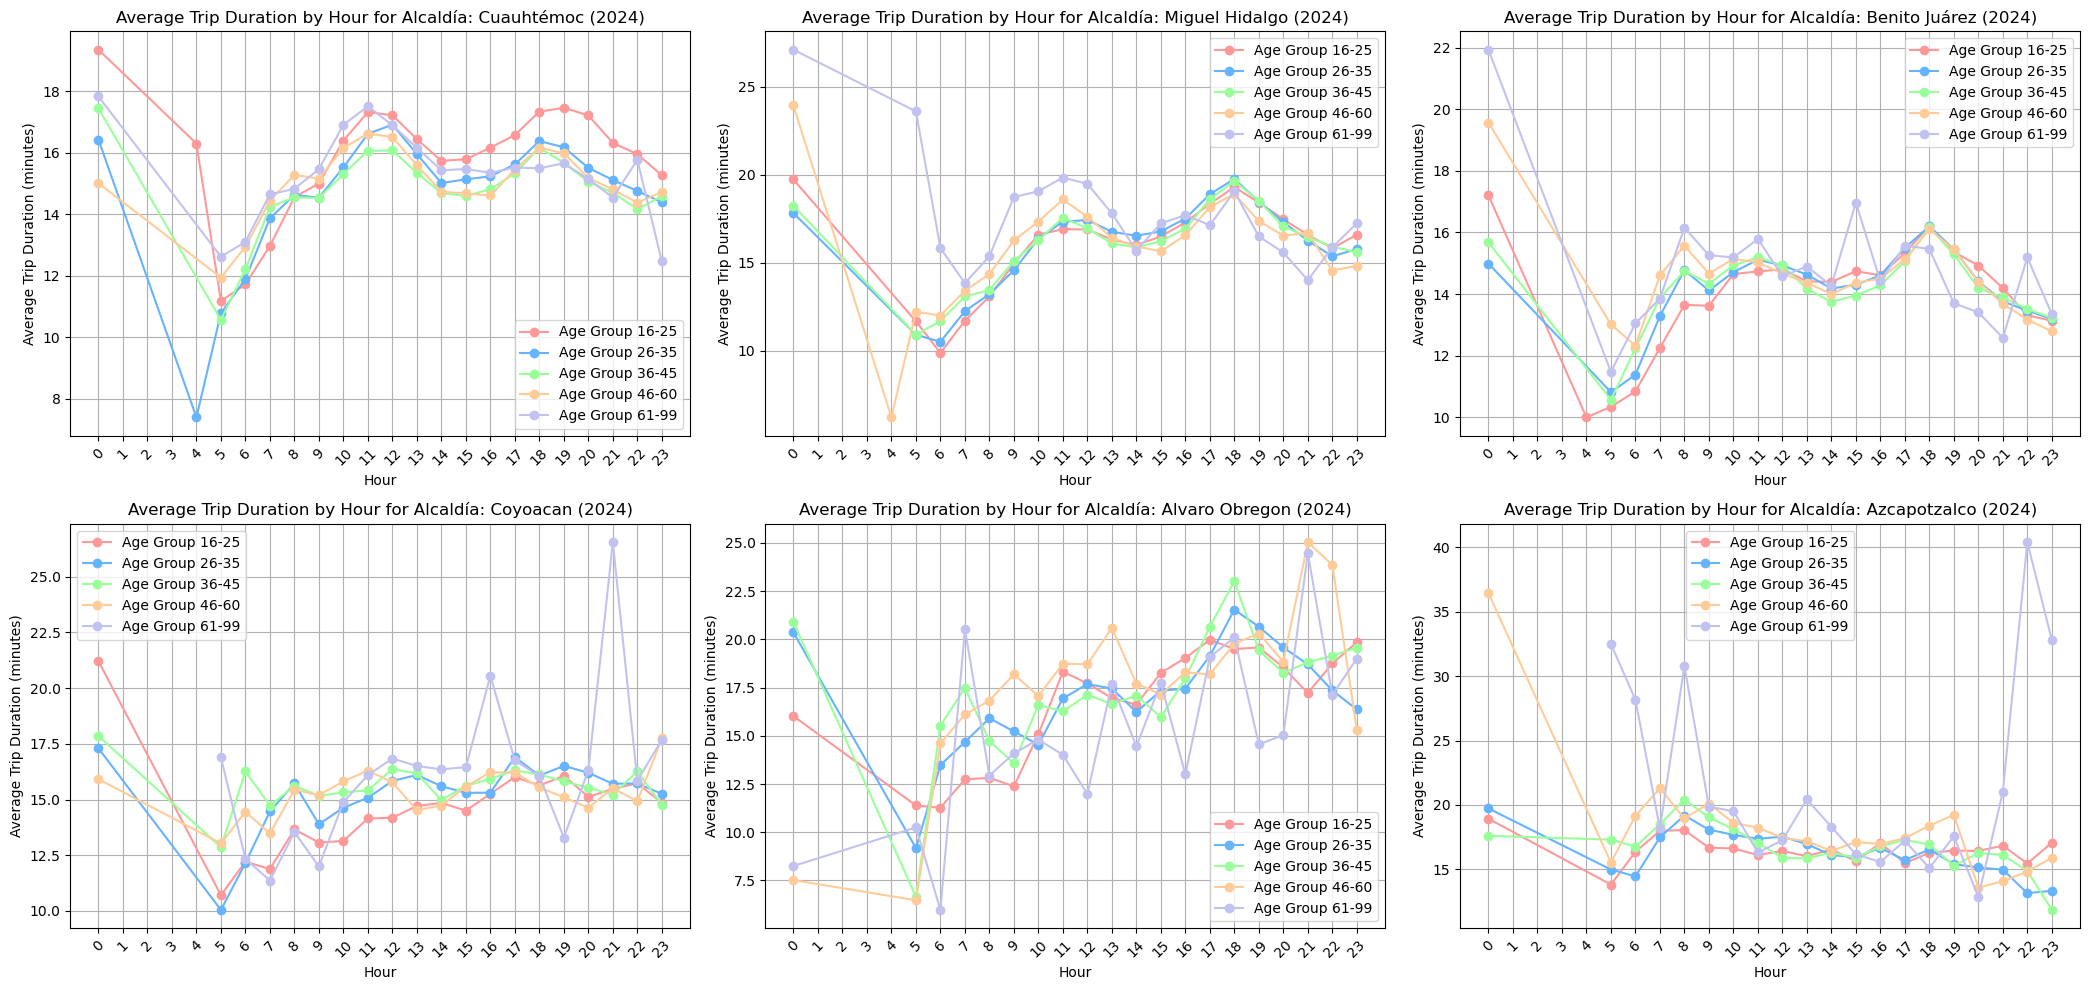

In [283]:
# Define the custom color palette for Age_Group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Define the unique Age Groups across both years to ensure consistency
age_groups = sorted(set(data_2023['Age_Group'].unique()).union(set(data_2024['Age_Group'].unique())))

# Create a dictionary to map each age group to a specific color
color_dict = {age_group: colors[i % len(colors)] for i, age_group in enumerate(age_groups)}

# Define the unique Alcaldias for 2023
alcaldias_2024 = data_2024['Alcaldia'].unique()

# Set up subplots with 2 rows and 3 columns (total 6 Alcaldias)
fig, axs = plt.subplots(2, 3, figsize=(21, 10))  # Updated layout

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each Alcaldia and create a separate plot
for i, alcaldia in enumerate(alcaldias_2024):
    # Filter data for the current Alcaldia
    alcaldia_data_2024 = data_2024[data_2024['Alcaldia'] == alcaldia]

    # Group by hour and age group to calculate the average trip duration
    avg_trip_duration_per_hour_age = alcaldia_data_2024.groupby(['Hour', 'Age_Group'])['Trip_Duration'].mean().reset_index(name='Avg_Trip_Duration')

    # Plot data for each Age Group
    for age_group in age_groups:
        group_data = avg_trip_duration_per_hour_age[avg_trip_duration_per_hour_age['Age_Group'] == age_group]
        axs[i].plot(group_data['Hour'], group_data['Avg_Trip_Duration'], label=f'Age Group {age_group}', marker='o', color=color_dict[age_group])

    # Add labels and legend
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Average Trip Duration (minutes)')
    axs[i].set_title(f'Average Trip Duration by Hour for Alcaldía: {alcaldia} (2024)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

# Update x-axis ticks to show all hours
for ax in axs:
    ax.set_xticks(range(24))  # Set the x-ticks to show all hours
    ax.set_xticklabels(range(24))  # Hour numbers as labels

# Adjust layout
plt.tight_layout()
plt.show()

### The big 3 alcaldias show similar behavior across alll ages
### as the day progresses, avg trip duration increases around rush hours and decreaeses as the day ends
### Alvaro obregon diplays higher peaks as the day progresses 
### Azcapotzalco shows higher durations earlier in the day and decreases gradually as the day porgresses
### age range 61-99 is the main group that does not always follow overal activity diplaying peaks at different hours of the day not consistent with the rest of the age group 